In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

rc('text', usetex=True)

Welcome to JupyROOT 6.22/02


In [2]:
mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})

In [3]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [4]:
def getJetData(inputFiles, isMC=False):
    
    cols = []
    scalar = []
    scalar.append('isBKG')
    scalar.append('polarization')
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    
    scalar.append('x_e')
    scalar.append('y_e')
    scalar.append('Q2_e')
    
    scalar.append('vertex_z')
    scalar.append('ptratio')
    scalar.append('ptmiss')
    scalar.append('acoplanarity')
    scalar.append('Empz')
    scalar.append('njets')

    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')
    scalar.append('e_phi')
    
    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_dphi')
    cols.append('jet_z')
    cols.append('jet_eta')
    cols.append('jet_phi')
    
    if(isMC):
        scalar.append('Weight')
        scalar.append('WeightGen')
        cols.append('genjet_p')
        cols.append('genjet_pt')
        cols.append('genjet_qt')
        cols.append('genjet_dphi')
        cols.append('genjet_z')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print ('\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds')
    return pd.concat([x for x in dataframes])

In [5]:
def printSummary(df):
    print (df['e_pt'].mean(), ' mean lepton pt')
    print (df['y'].mean(), ' mean inelasticity')
    print (df['jet_p'].mean(), ' mean jet p')
    print (df['jet_pt'].mean(), ' mean jet pT')
    print (df['jet_pt'].describe())

    print (df['x'].mean(), ' mean x')
    print (df['Q2'].mean(), ' mean Q2')
    print (df['Q2'].describe())
    return

In [6]:
def getData(inputFiles, isMC=False):
    
    cols = []
    scalar = []  
    scalar.append('isBKG')
    scalar.append('polarization')

    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    
        
    scalar.append('x_e')
    scalar.append('y_e')
    scalar.append('Q2_e')

    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')
    scalar.append('e_phi')

    scalar.append('vertex_z')
    scalar.append('ptratio')
    scalar.append('ptmiss')
    scalar.append('acoplanarity')
    scalar.append('Empz')
    scalar.append('njets')
    
    if(isMC):
        scalar.append('Weight')
        scalar.append('WeightGen')
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print ('\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds')
    return pd.concat([x for x in dataframes])

In [7]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>15', 'e_pt >15')
    temp = applyCut(temp, 'isBKG<1.0', 'isBKG')

    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [8]:
def applyCutsJets(df,isMC=False):
    temp = df
    temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>15', 'e_pt >15')
    temp = applyCut(temp, 'jet_pt>10', 'jet_pt>10')
    temp = applyCut(temp, 'isBKG<1.0', 'isBKG')

    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)
    if(isMC):
        temp.eval('genjet_qtnormept= genjet_qt/e_pt', inplace=True)
        temp.eval('genjet_qtnormjetpt= genjet_qt/genjet_pt', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

## get data and MC and apply cuts

In [9]:
df = applyCuts(getData(['data_wta.root']))
dfraw = applyCuts(getData(['data_echeme.root']))


 Processed data_wta.root in 0.4 seconds
abs(vertex_z)<25 and and vertex_z!=0 110989  fraction kept: 79.5
0.2 < y < 0.7 65545  fraction kept: 59.1
Q2>150 65545  fraction kept: 100.0
e_pt >15 21030  fraction kept: 32.1
isBKG 18260  fraction kept: 86.8

 Processed data_echeme.root in 0.2 seconds
abs(vertex_z)<25 and and vertex_z!=0 110989  fraction kept: 79.5
0.2 < y < 0.7 65545  fraction kept: 59.1
Q2>150 65545  fraction kept: 100.0
e_pt >15 21030  fraction kept: 32.1
isBKG 18260  fraction kept: 86.8


In [10]:
mc = applyCuts(getData(['djangoh.root'],isMC=True))
altmc = applyCuts(getData(['rapgap.root'],isMC=True))


 Processed djangoh.root in 1.4 seconds
abs(vertex_z)<25 and and vertex_z!=0 830140  fraction kept: 96.5
0.2 < y < 0.7 580675  fraction kept: 69.9
Q2>150 580675  fraction kept: 100.0
e_pt >15 224665  fraction kept: 38.7
isBKG 200142  fraction kept: 89.1

 Processed rapgap.root in 1.6 seconds
abs(vertex_z)<25 and and vertex_z!=0 900001  fraction kept: 96.6
0.2 < y < 0.7 634712  fraction kept: 70.5
Q2>150 634712  fraction kept: 100.0
e_pt >15 253068  fraction kept: 39.9
isBKG 225630  fraction kept: 89.2


In [11]:
name = {}
name['MC'] = 'Djangoh'
name['alt'] = 'Rapgap'

In [12]:
mc.head()

,isBKG,polarization,x,y,Q2,x_e,y_e,Q2_e,e_eta,e_theta,...,vertex_z,ptratio,ptmiss,acoplanarity,Empz,njets,Weight,WeightGen,logQ2,logx
0,0.0,0.0,0.011273,0.269797,308.923553,0.011356,0.267832,308.923553,-0.988544,2.429109,...,7.566709,0.854048,2.440001,175.606247,55.436275,2.0,1.000000,1.000000,2.489851,-1.947944
11,0.0,0.0,0.014265,0.217115,314.569122,0.013249,0.233756,314.569122,-1.002234,2.438012,...,13.042461,0.808806,3.017151,177.782181,53.594379,1.0,1.945175,1.945175,2.497716,-1.845731
12,0.0,0.0,0.048017,0.275274,1342.502075,0.048487,0.272603,1342.502075,-0.250676,1.818888,...,-2.954275,1.024087,5.588820,169.953552,55.529240,2.0,1.000000,1.000000,3.127915,-1.318607
15,0.0,0.0,0.015995,0.289383,470.132843,0.014716,0.314544,470.132843,-0.745620,2.255610,...,11.972982,0.771342,4.363582,178.867584,52.361351,1.0,1.000000,1.000000,2.672221,-1.796009
16,0.0,0.0,0.013582,0.332883,459.198792,0.013674,0.330647,459.198792,-0.745500,2.255517,...,12.000411,1.158926,3.023149,176.235306,55.644417,1.0,1.000000,1.000000,2.662001,-1.867048


## plot electron variables (data and MC)

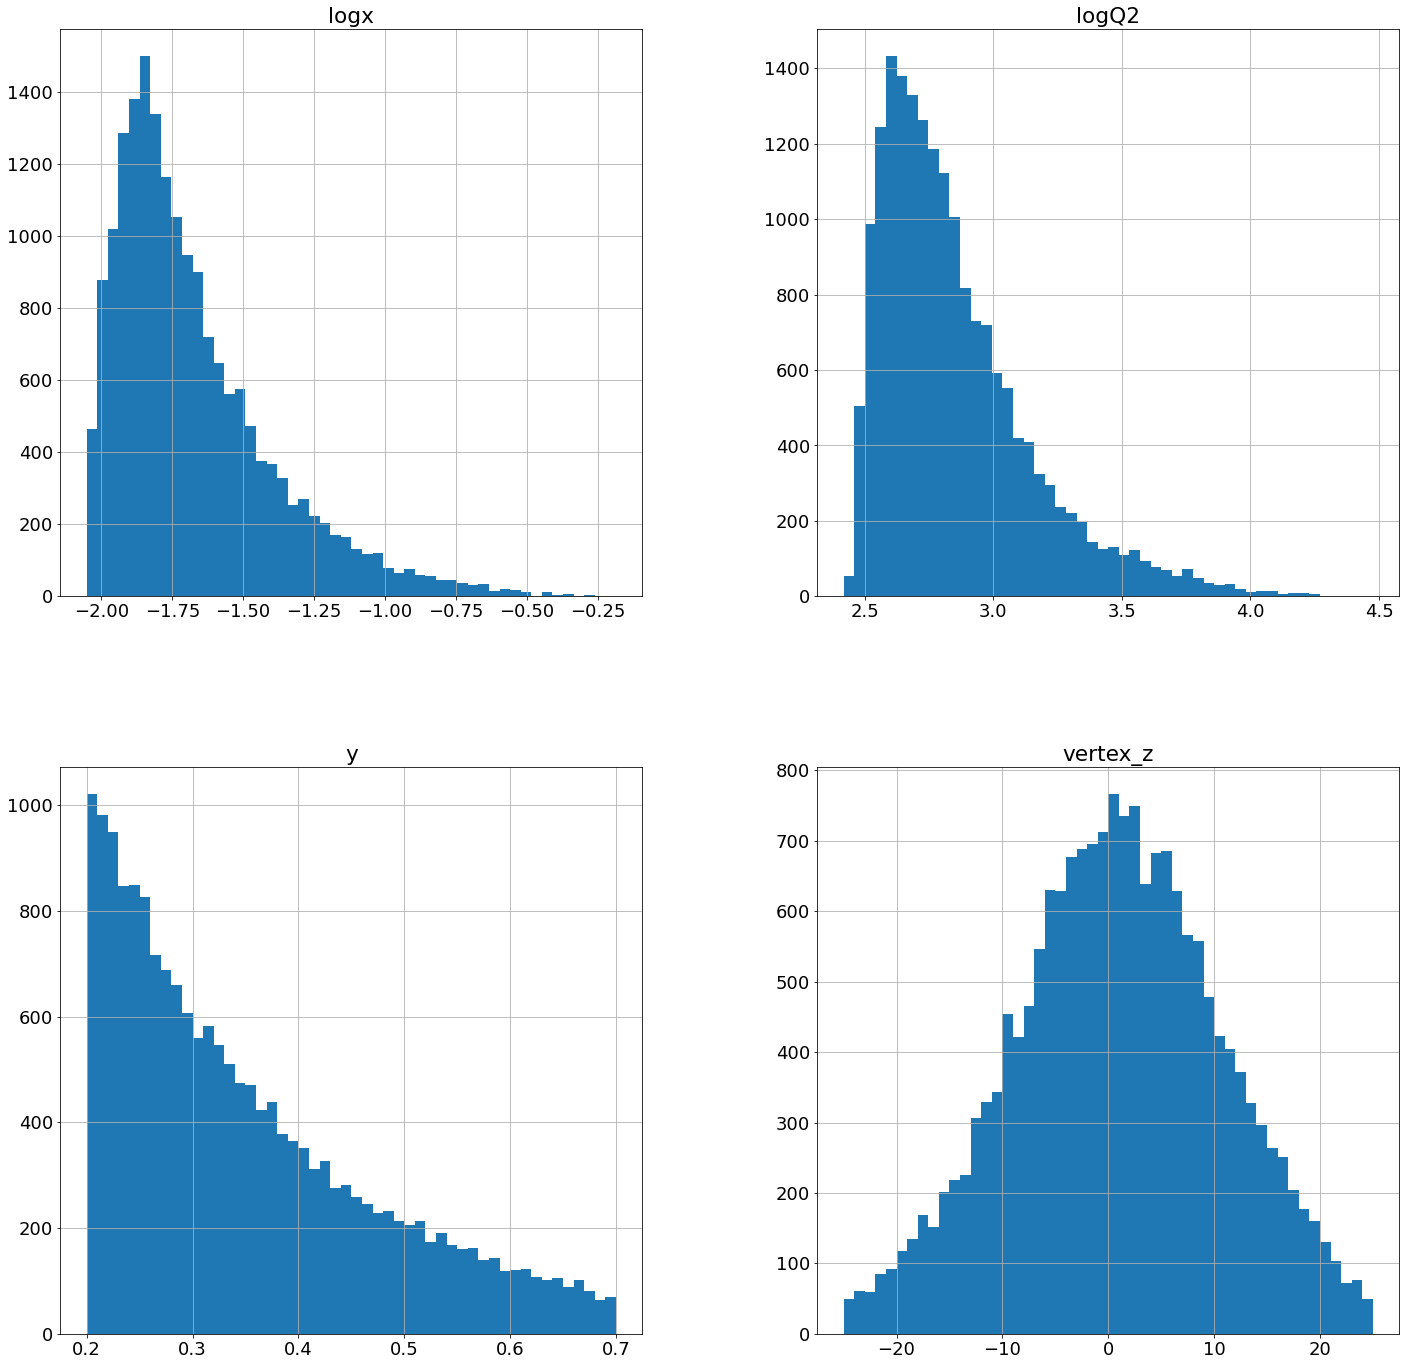

In [13]:
rc('text', usetex=False)
df.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y','vertex_z'])
plt.show()

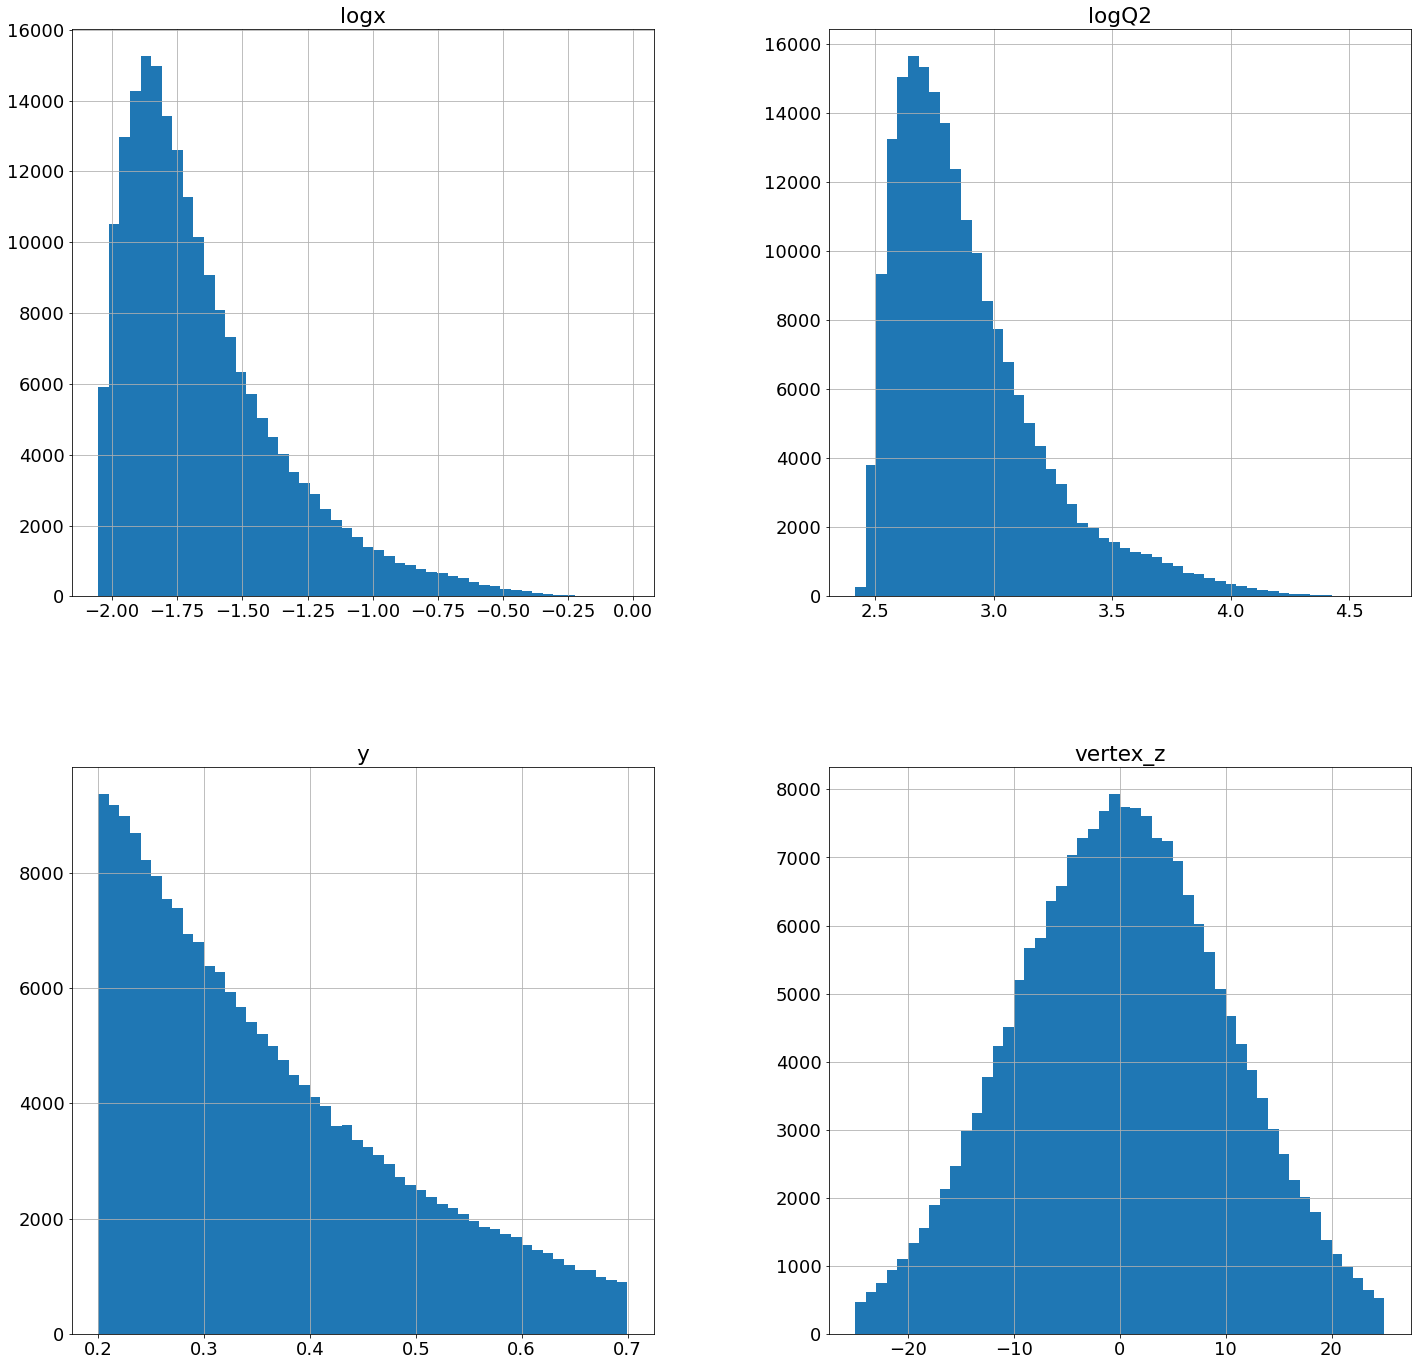

In [14]:
rc('text', usetex=False)
mc.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y','vertex_z'])
plt.show()

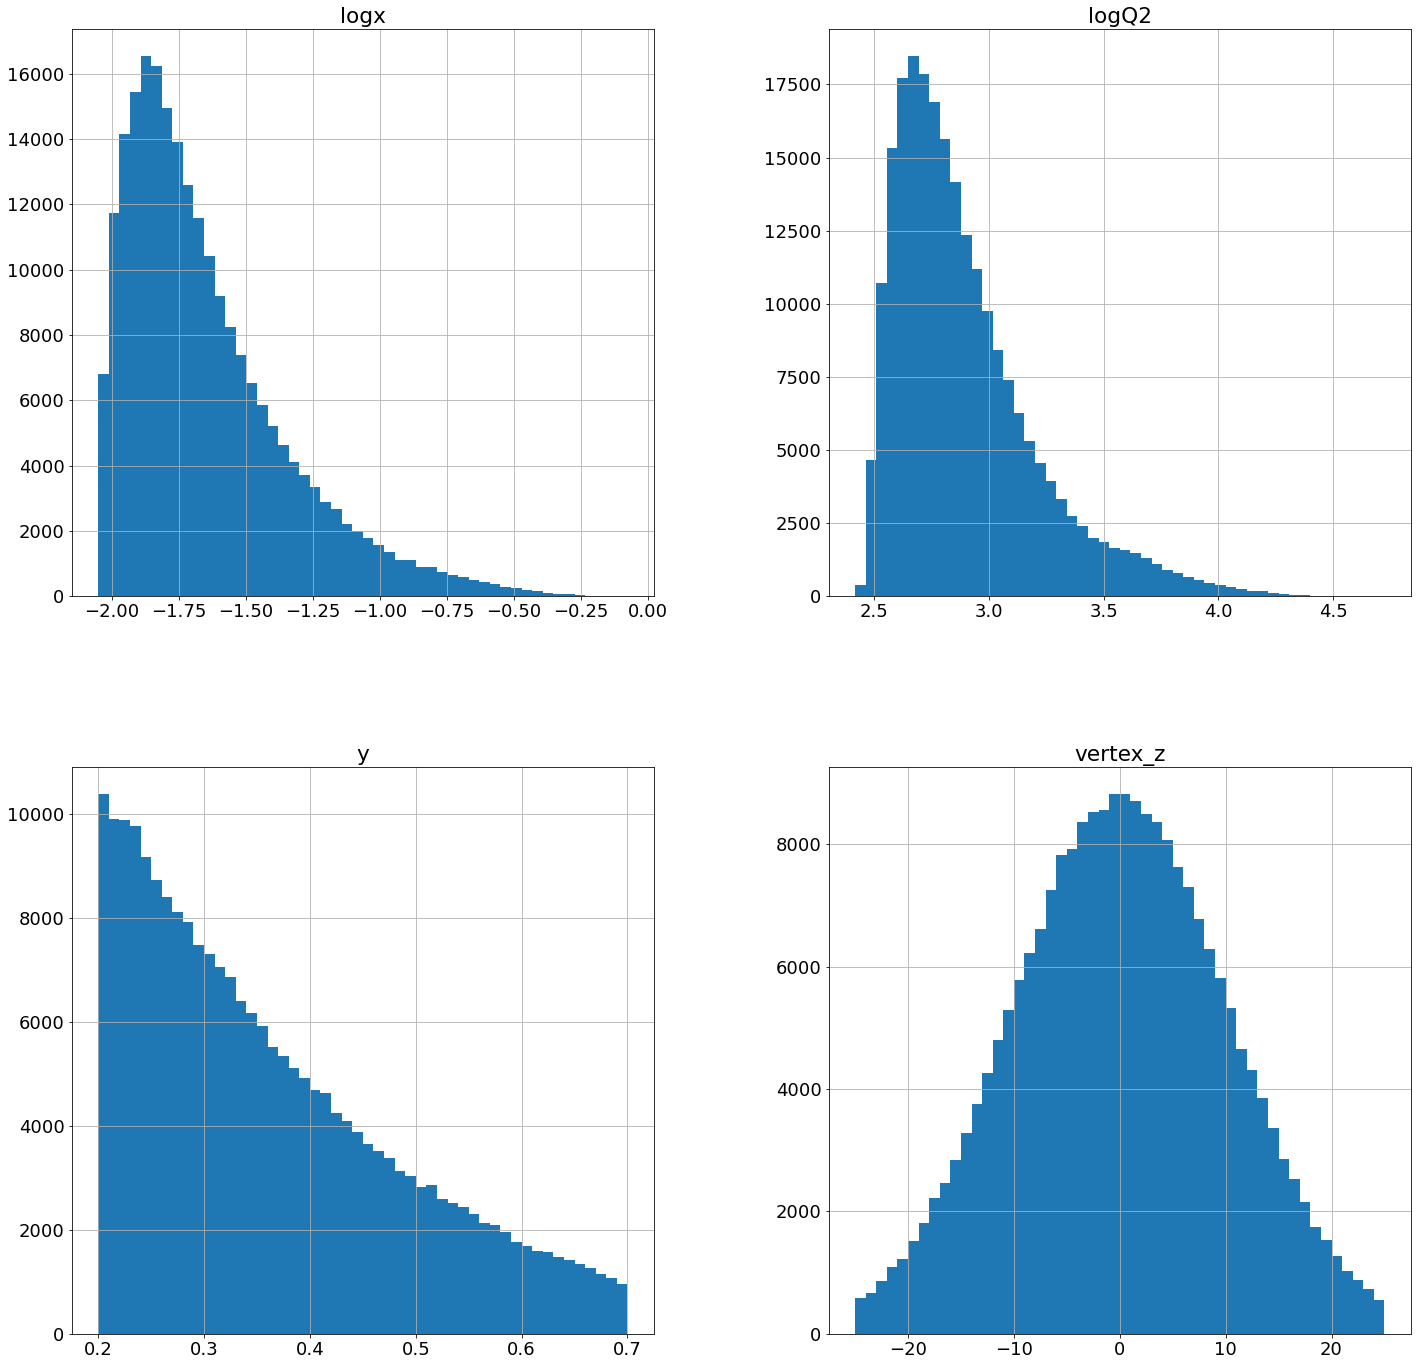

In [15]:
rc('text', usetex=False)
altmc.hist(figsize=(24,24),bins=50,column=['logx','logQ2','y','vertex_z'])
plt.show()

## Get jet data and apply selection

In [16]:
#df_jet      = applyCutsJets(getJetData(['2006data.root']))
df_jet      = applyCutsJets(getJetData(['data_wta.root']))
dfraw_jet      = applyCutsJets(getJetData(['data_echeme.root']))


 Processed data_wta.root in 3.0 seconds
abs(vertex_z)<25 and and vertex_z!=0 113001  fraction kept: 90.1
0.2 < y < 0.7 67489  fraction kept: 59.7
Q2>150 67489  fraction kept: 100.0
e_pt >15 24674  fraction kept: 36.6
jet_pt>10 22400  fraction kept: 90.8
isBKG 19536  fraction kept: 87.2

 Processed data_echeme.root in 2.8 seconds
abs(vertex_z)<25 and and vertex_z!=0 111629  fraction kept: 90.0
0.2 < y < 0.7 66449  fraction kept: 59.5
Q2>150 66449  fraction kept: 100.0
e_pt >15 24440  fraction kept: 36.8
jet_pt>10 22125  fraction kept: 90.5
isBKG 19278  fraction kept: 87.1


In [17]:
mc_jet = applyCutsJets(getJetData(['djangoh.root'],isMC=True),isMC=True)
altmc_jet = applyCutsJets(getJetData(['rapgap.root'],isMC=True),isMC=True)


 Processed djangoh.root in 33.8 seconds
abs(vertex_z)<25 and and vertex_z!=0 920853  fraction kept: 96.6
0.2 < y < 0.7 650115  fraction kept: 70.6
Q2>150 650115  fraction kept: 100.0
e_pt >15 271425  fraction kept: 41.8
jet_pt>10 239917  fraction kept: 88.4
isBKG 214401  fraction kept: 89.4

 Processed rapgap.root in 35.0 seconds
abs(vertex_z)<25 and and vertex_z!=0 958520  fraction kept: 96.7
0.2 < y < 0.7 677816  fraction kept: 70.7
Q2>150 677816  fraction kept: 100.0
e_pt >15 294734  fraction kept: 43.5
jet_pt>10 263459  fraction kept: 89.4
isBKG 235608  fraction kept: 89.4


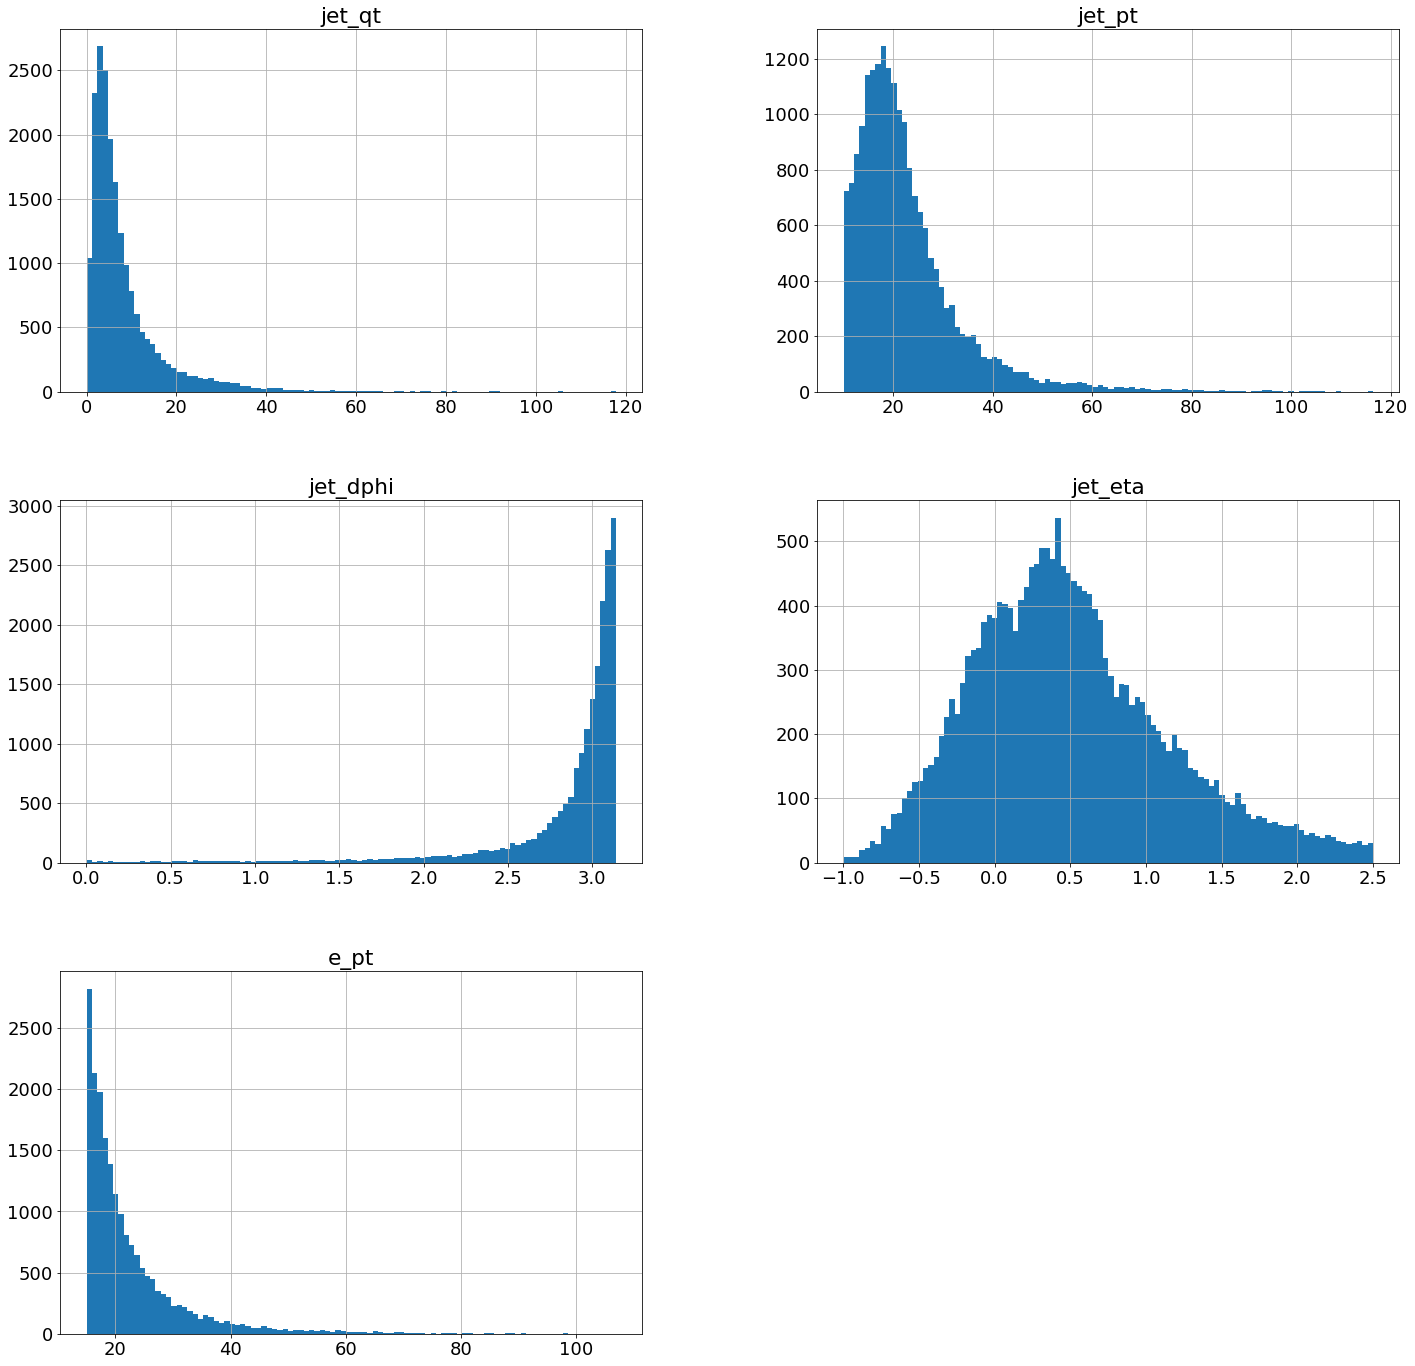

In [18]:
rc('text', usetex=False)
df_jet.hist(figsize=(24,24),bins=100,column=['jet_qt','jet_pt','jet_dphi','jet_eta','e_pt'])
plt.show()


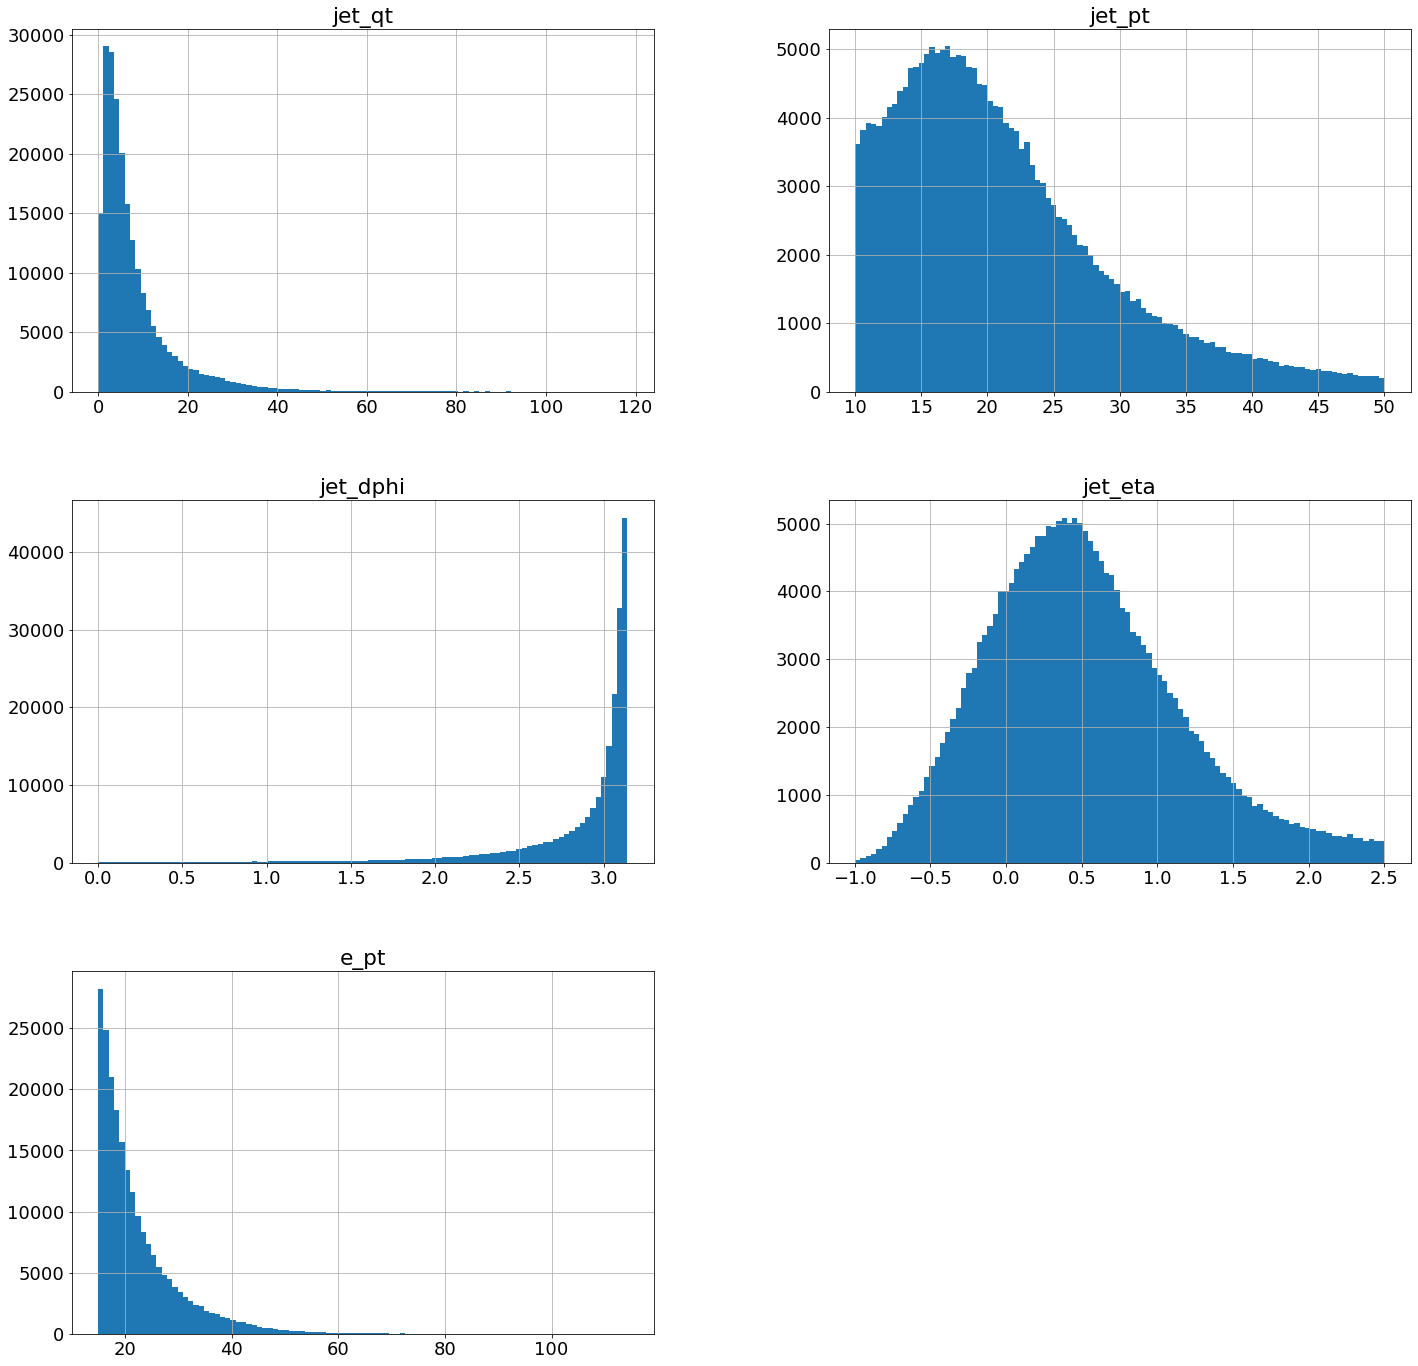

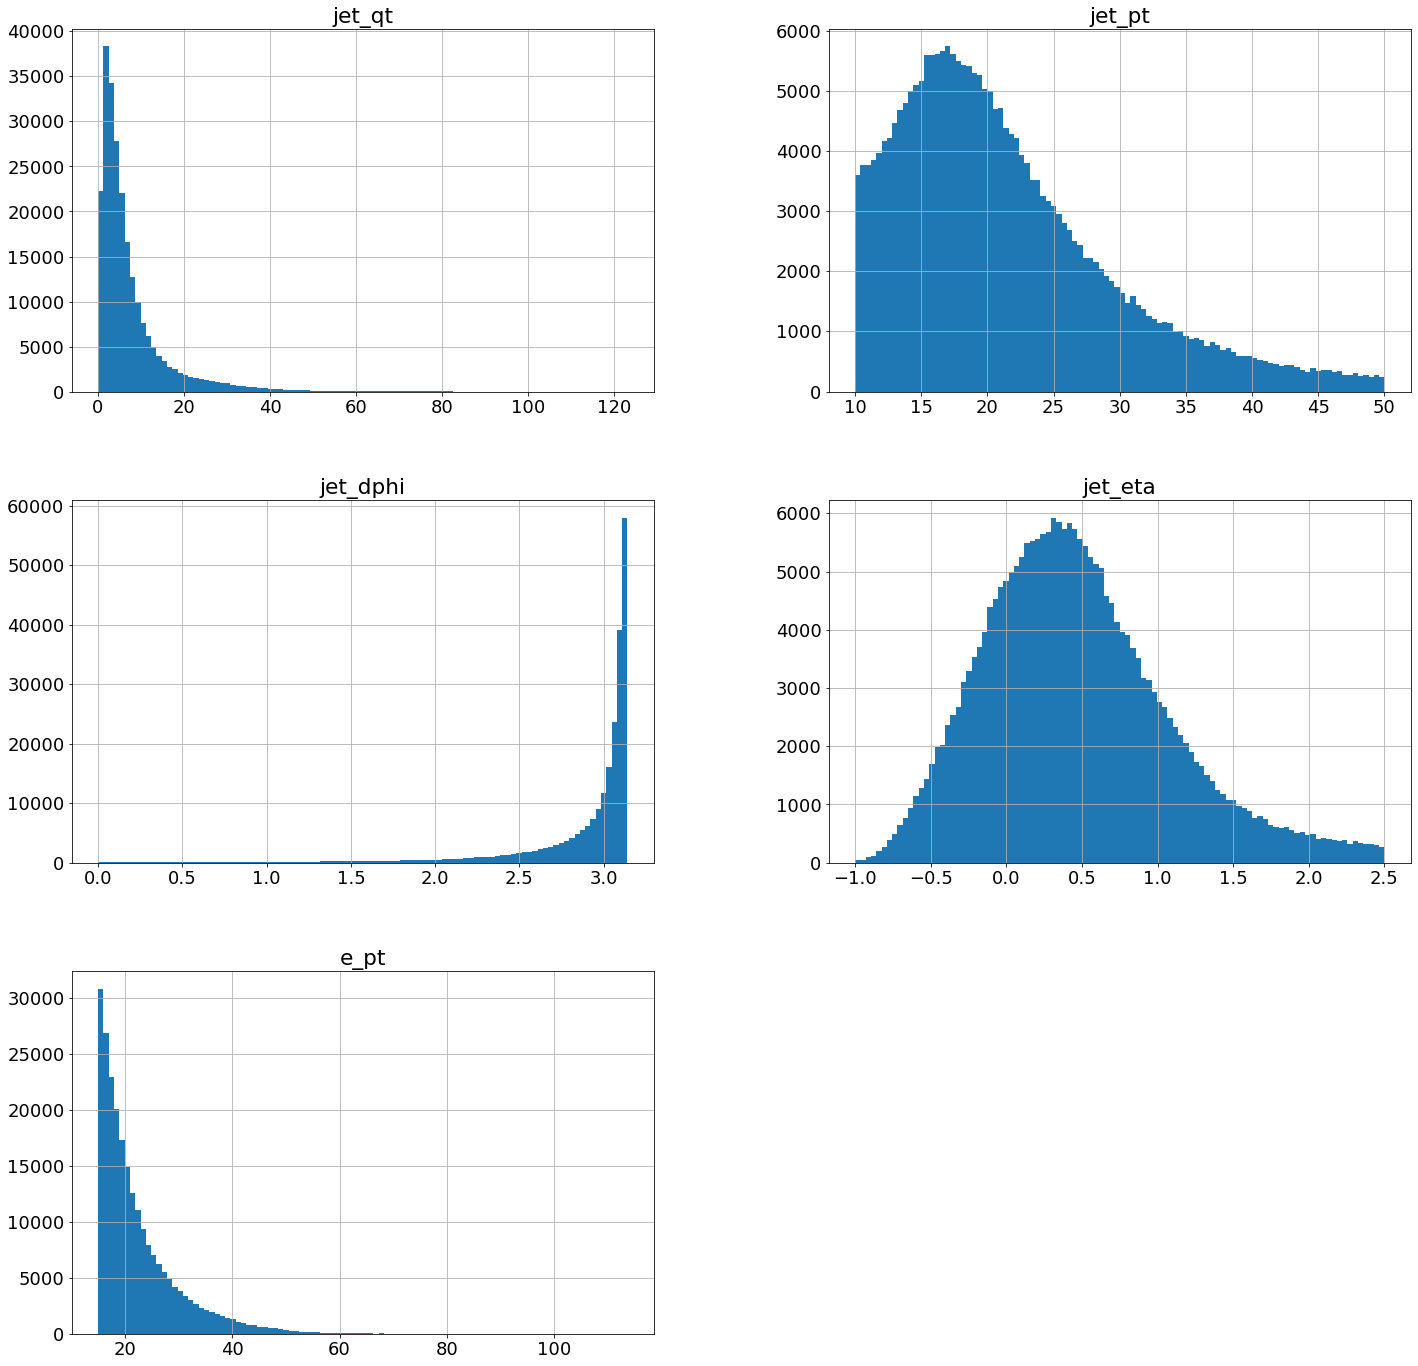

In [19]:
mc_jet.hist(figsize=(24,24),bins=100,column=['jet_qt','jet_pt','jet_dphi','jet_eta','e_pt'])
plt.show()
altmc_jet.hist(figsize=(24,24),bins=100,column=['jet_qt','jet_pt','jet_dphi','jet_eta','e_pt'])
plt.show()

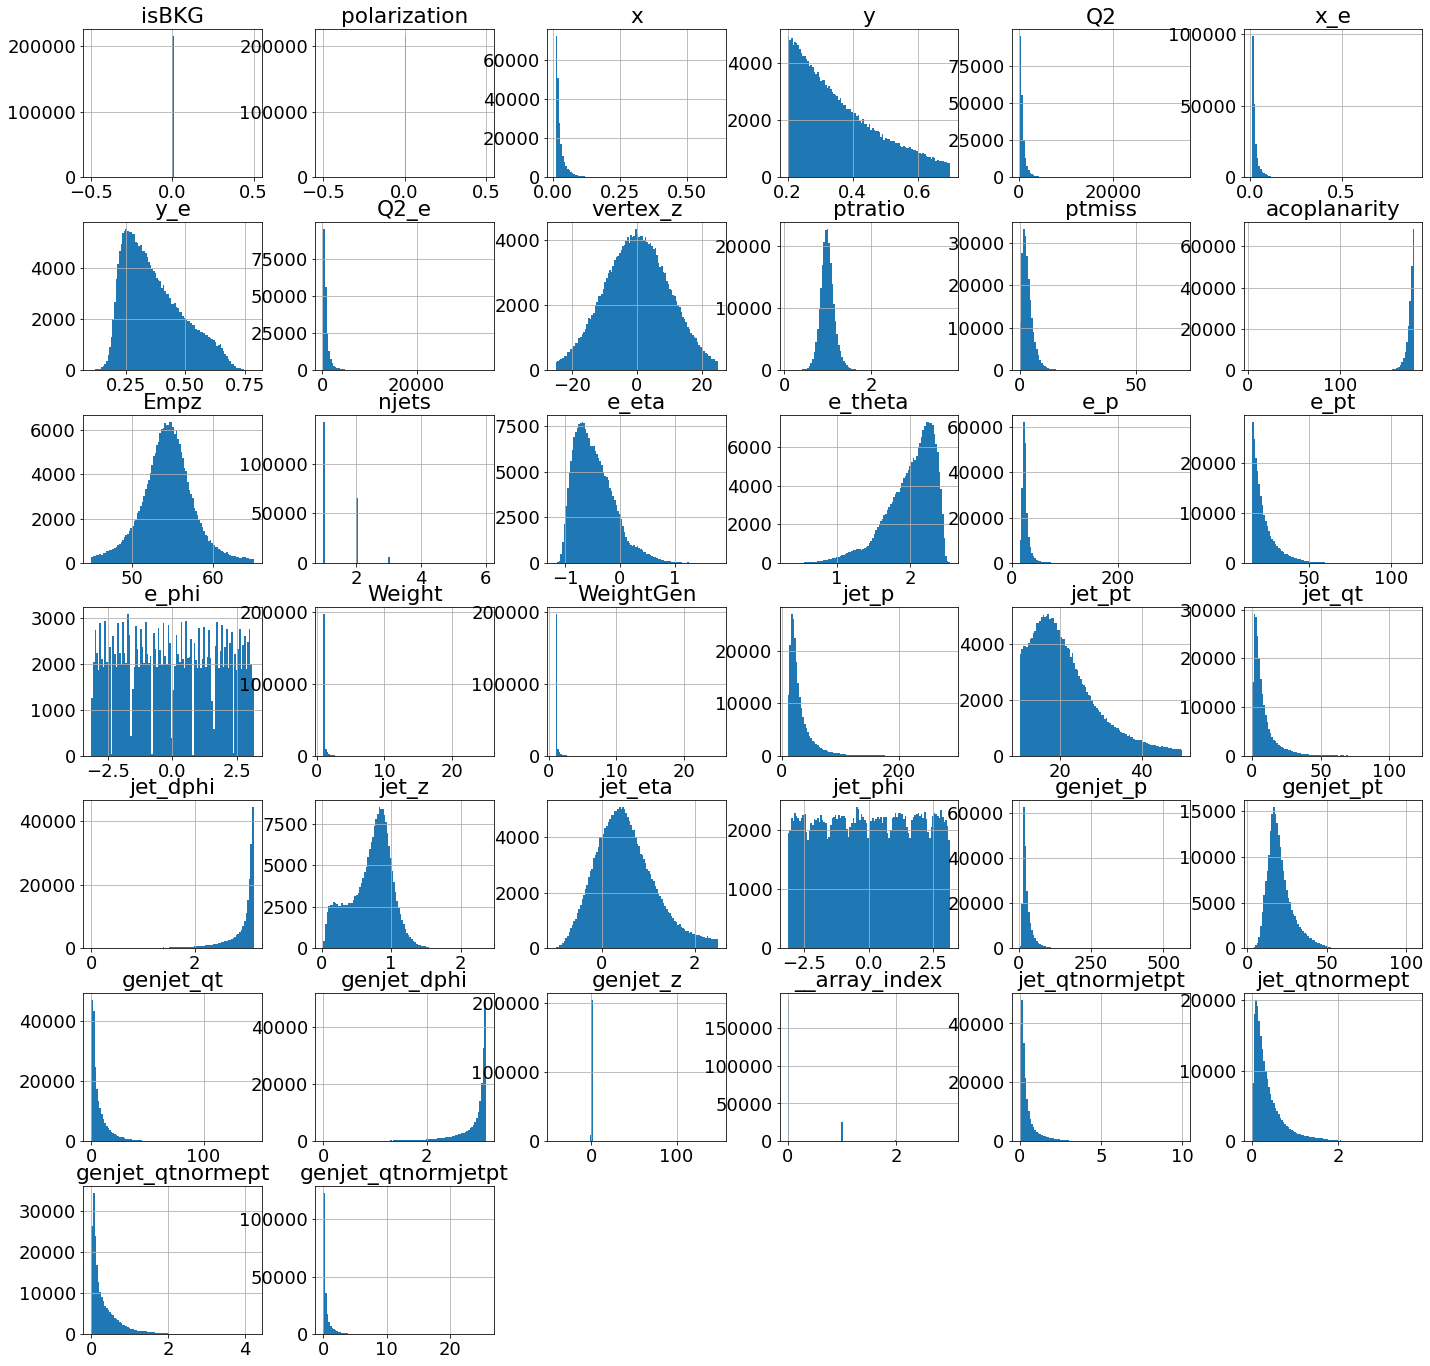

In [20]:
rc('text', usetex=False)

mc_jet.hist(figsize=(24,24),bins=100)
plt.show()

## Peek into data format

In [21]:
df_jet.head()

,isBKG,polarization,x,y,Q2,x_e,y_e,Q2_e,vertex_z,ptratio,...,jet_p,jet_pt,jet_qt,jet_dphi,jet_z,jet_eta,jet_phi,__array_index,jet_qtnormjetpt,jet_qtnormept
13,0.0,16.080000,0.013004,0.258633,341.601227,0.012774,0.263293,341.601227,-9.306458,0.895417,...,20.279922,19.147213,3.291964,3.127987,0.938242,0.342297,0.638275,0,0.171929,0.207514
14,0.0,16.080000,0.023728,0.429481,1035.069092,0.023945,0.425602,1035.069092,-6.796051,1.074758,...,26.981461,26.913399,2.531230,3.138738,1.069173,0.071103,5.239500,0,0.094051,0.103810
19,0.0,16.959999,0.013761,0.315783,441.353394,0.013752,0.315979,441.353394,4.207611,1.208110,...,23.697838,22.682232,5.525858,3.064031,0.967392,0.298145,2.789366,0,0.243621,0.318033
23,0.0,16.080000,0.015147,0.354465,545.332092,0.014465,0.371176,545.332092,3.842102,1.043469,...,20.980661,19.492085,1.497014,3.081748,0.646453,0.388370,4.737070,0,0.076801,0.080841
26,0.0,16.959999,0.010632,0.422065,455.770325,0.010334,0.434242,455.770325,9.715515,0.835164,...,14.313573,12.967265,3.318848,3.057752,0.851421,-0.451830,4.160436,0,0.255940,0.206680


In [22]:
mc_jet.head()

,isBKG,polarization,x,y,Q2,x_e,y_e,Q2_e,vertex_z,ptratio,...,genjet_p,genjet_pt,genjet_qt,genjet_dphi,genjet_z,__array_index,jet_qtnormjetpt,jet_qtnormept,genjet_qtnormept,genjet_qtnormjetpt
0,0.0,0.0,0.011273,0.269797,308.923553,0.011356,0.267832,308.923553,7.566709,0.854048,...,22.613100,20.422804,6.900935,2.940930,0.776283,0,0.318244,0.409720,0.458856,0.337903
9,0.0,0.0,0.014265,0.217115,314.569122,0.013249,0.233756,314.569122,13.042461,0.808806,...,14.361694,14.224248,1.685622,3.061423,0.924958,0,0.210514,0.177215,0.108572,0.118503
10,0.0,0.0,0.048017,0.275274,1342.502075,0.048487,0.272603,1342.502075,-2.954275,1.024087,...,89.671570,24.829397,20.350483,2.433517,0.226412,0,0.727157,0.684356,0.651226,0.819612
11,0.0,0.0,0.048017,0.275274,1342.502075,0.048487,0.272603,1342.502075,-2.954275,1.024087,...,17.411993,15.729913,20.771742,2.508078,0.642255,1,1.292002,0.654926,0.664706,1.320525
13,0.0,0.0,0.015995,0.289383,470.132843,0.014716,0.314544,470.132843,11.972982,0.771342,...,18.332420,18.246376,0.381120,3.138251,0.929709,0,0.257358,0.205292,0.021231,0.020887


## pT spectrum

Cross section [0.00000000e+00 6.29653573e+02 1.93574627e+03 8.53004553e+02
 3.62813608e+02 1.54228293e+02 6.43626199e+01 2.66667578e+01
 1.16726670e+01 2.73696207e+00 6.01041404e-01]
Cross section [ 703.90085493  957.59814192 1119.52323002  891.90778562  480.91230359
  209.91820383   87.73862033   32.70451424   12.67893143    3.7566146
    1.24501434]


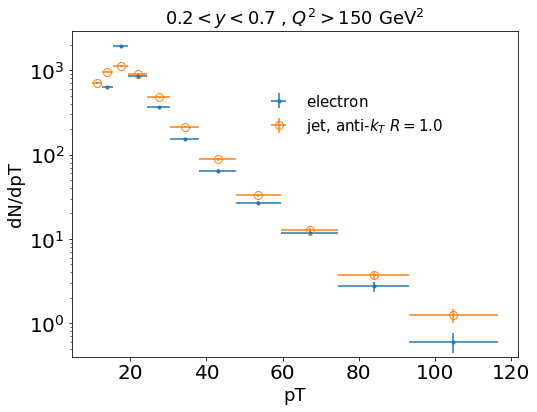

In [23]:
#mport seaborn as sns
nbins = 12
minpt = 10
maxpt = max(df_jet['jet_pt'])
fig, ax1 = plt.subplots(figsize=(8,6))

##Electron distribution
y, x  = np.histogram(df.query('e_pt>5')['e_pt'],bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
yerr = np.sqrt(y)
y = y/(xerr*2.0)
yerr = yerr/(xerr*2.0)
print ('Cross section', y)

plt.errorbar(x,y, yerr=yerr,  xerr = xerr, fmt='.',ls='none',label=r'$\mathrm{electron}$')


y, x  = np.histogram(df_jet.query('jet_pt>5')['jet_pt'],bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2

yerr = np.sqrt(y)
y = y/(xerr*2.0)
yerr = yerr/(xerr*2.0)
print ('Cross section', y )
plt.errorbar(x,y, yerr=yerr,xerr = xerr, fmt='o',ls='none',markersize=8,fillstyle='none',label='$\mathrm{jet}$, $\mathrm{anti}$-$k_{T}$ $R=1.0$')

plt.yscale('log')
ax1.set_xlabel('pT' ,fontsize=18)
ax1.set_ylabel('dN/dpT', fontsize=18)
plt.title('$0.2 < y < 0.7$ , $Q^2 > 150\ \mathrm{GeV^2}$',   fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(loc='best',frameon=False,fontsize=18)#bbox_to_anchor=(0.40, 0.85

ax1.tick_params('both',labelsize=20)

plt.savefig('H1_CrossSection_NC.png', bbox_inches='tight')
plt.savefig('H1_CrossSection_NC.pdf', bbox_inches='tight')

plt.legend(loc='best',frameon=False,fontsize=15,bbox_to_anchor=(0.40, 0.85))

## DATA/MC comparisons

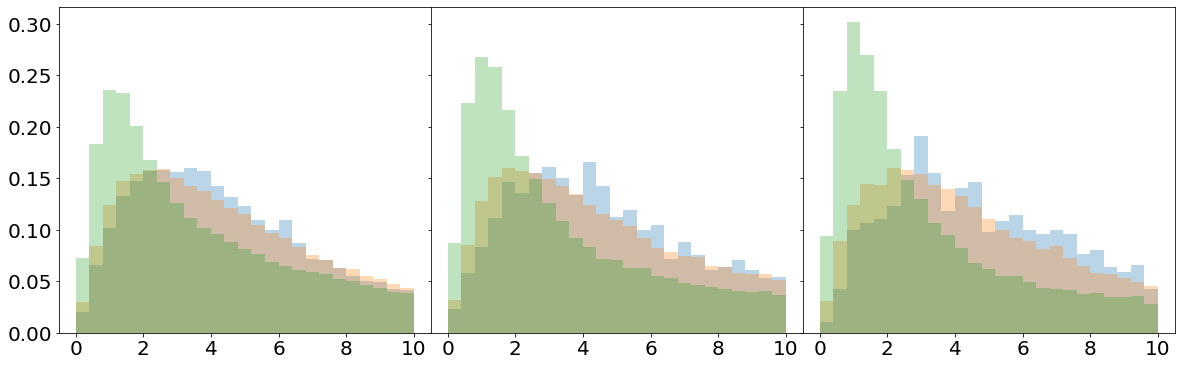

In [24]:
#from matplotlib import rc
#rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(15,20), (20,25),(25,30)]):
    #plot data
    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=25,range=(0,10.0),density=True,alpha=0.3,label='Data')
    #plot MC
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qt'],bins=25,range=(0,10.0),density=True,alpha=0.3, label='MC reco')
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_qt'],bins=25,range=(0,10.0),density=True,alpha=0.3, label='MC true')
    
    
    #axs[counter].xaxis.set_label_text(r'$q_{T}$  $\mathrm{[GeV]}$', fontsize=25)
    #axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    #axs[counter].text(0.07,10, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
    #                  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

#axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

#plt.savefig('NC_LeptonJetqt.png', bbox_inches='tight')
#plt.savefig('NC_LeptonJetqt.pdf', bbox_inches='tight')

17.121523  mean lepton pt
0.35194394  mean inelasticity
23.437885  mean jet p
17.941673  mean jet pT
count    10467.000000
mean        17.941673
std          5.167342
min         10.001140
25%         14.347898
50%         17.256813
75%         20.574727
max         74.988495
Name: jet_pt, dtype: float64
0.014069594  mean x
481.43384  mean Q2
count    10467.000000
mean       481.433838
std        144.037384
min        262.383331
25%        379.244186
50%        450.115387
75%        544.241852
max       1385.642700
Name: Q2, dtype: float64
###########


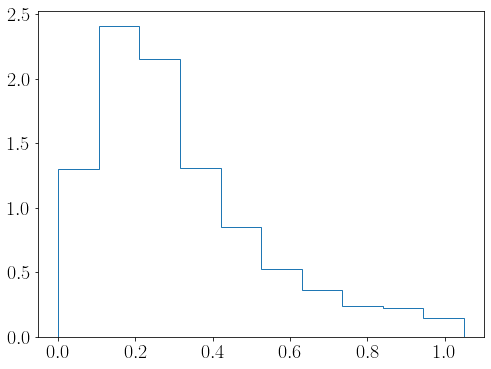

In [26]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print ('###########')
    
plt.hist(df_cut['jet_qtnormjetpt'],bins=10,range=(0,1.05),density=True,histtype='step')    
#plt.xlabel(r'$q_{T}/p_{\mathrm{T}}^{jet}$', fontsize=25)
#plt.ylabel(r'$1/\sigma_{\mathrm{DIS}} \times d\sigma/dq_{T}$ $\ \mathrm{ GeV}^{-1}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)

#plt.text(0.45,1.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n' +
#                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=21)

#plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('qtplot.png', bbox_inches='tight')
plt.savefig('qtplot.pdf', bbox_inches='tight')

17.121523  mean lepton pt
0.35194394  mean inelasticity
23.437885  mean jet p
17.941673  mean jet pT
count    10467.000000
mean        17.941673
std          5.167342
min         10.001140
25%         14.347898
50%         17.256813
75%         20.574727
max         74.988495
Name: jet_pt, dtype: float64
0.014069594  mean x
481.43384  mean Q2
count    10467.000000
mean       481.433838
std        144.037384
min        262.383331
25%        379.244186
50%        450.115387
75%        544.241852
max       1385.642700
Name: Q2, dtype: float64
17.194744  mean lepton pt
0.36766717  mean inelasticity
22.880215  mean jet p
17.311972  mean jet pT
count    108751.000000
mean         17.311972
std           4.893677
min          10.001206
25%          13.712574
50%          16.632612
75%          19.970930
max          49.896599
Name: jet_pt, dtype: float64
0.013900331  mean x
497.6691  mean Q2
count    108751.000000
mean        497.669098
std         148.349152
min         259.698120
25%       

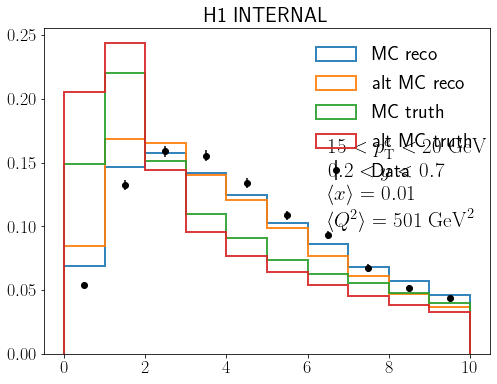

In [28]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qt'],bins=10,range=(0,10.0))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = np.sum(y)
y = y/width
y = y/integral
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, fmt='o',ls='none',label='Data',color='black')

#plot MC
df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['jet_qt'],bins=10,range=(0,10.0),density=True,alpha=0.9, label='MC reco',histtype='step',lw=2)
printSummary(df_cut)

df_cut = altmc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['jet_qt'],bins=10,range=(0,10.0),density=True,alpha=0.9, label='alt MC reco',histtype='step',lw=2)
printSummary(df_cut)


df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['genjet_qt'],bins=10,range=(0,10.0),density=True,alpha=0.9, label='MC truth',histtype='step',lw=2)
printSummary(df_cut)

df_cut = altmc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
plt.hist(df_cut['genjet_qt'],bins=10,range=(0,10.0),density=True,alpha=0.9, label='alt MC truth',histtype='step',lw=2)
printSummary(df_cut)



#plt.xlabel(r'$q_{\mathrm{T}} $ $\mathrm{[GeV]}$', fontsize=25)
#plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


plt.text(6.5,0.10, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()) + '$\n$'+ r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()), fontsize=21)


#plt.text(6.5,0.10, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, r'$\mathrm{H1}$ $\mathrm{INTERNAL}$', fontsize=28)

#plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
#plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.title('H1 INTERNAL', fontsize=21)
plt.savefig('H1_qtplot.png', bbox_inches='tight')
plt.savefig('H1_qtplot.pdf', bbox_inches='tight')

No handles with labels found to put in legend.


17.121523  mean lepton pt
0.35194394  mean inelasticity
23.437885  mean jet p
17.941673  mean jet pT
count    10467.000000
mean        17.941673
std          5.167342
min         10.001140
25%         14.347898
50%         17.256813
75%         20.574727
max         74.988495
Name: jet_pt, dtype: float64
0.014069594  mean x
481.43384  mean Q2
count    10467.000000
mean       481.433838
std        144.037384
min        262.383331
25%        379.244186
50%        450.115387
75%        544.241852
max       1385.642700
Name: Q2, dtype: float64
###########


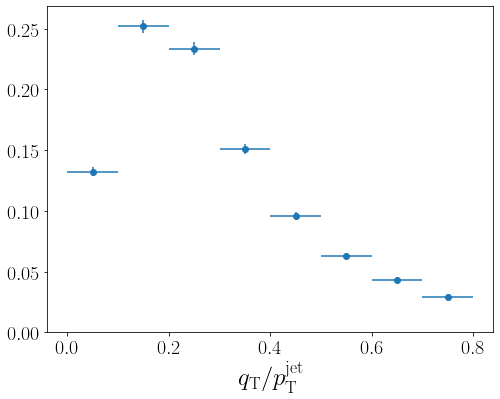

In [32]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
printSummary(df_cut)
print ('###########')
    
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,4.0),normed=True,histtype='step')    

y, x  = np.histogram(df_cut['jet_qtnormjetpt'],bins=8,range=(0,0.80))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)

integral = 1.0*np.sum(y)
#y = y/width
y = y/integral
erry=erry/integral

plt.errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none')


plt.xlabel(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{jet}}$ ', fontsize=25)
#plt.ylabel(r'1/\sigma \times d\sigma/dq_{\mathrm{T}}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
#                    r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_qtnormplot.png', bbox_inches='tight')
plt.savefig('H1_qtnormplot.pdf', bbox_inches='tight')

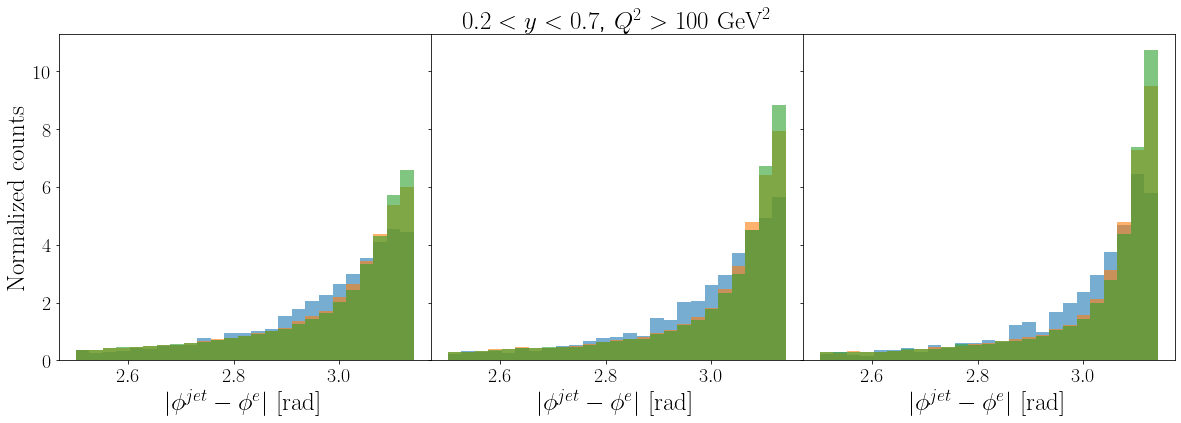

In [33]:

#from matplotlib import rc
#rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})


for counter,edges in enumerate([(15,20), (20,25),(25,30)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_dphi'],bins=25,range=(2.5,3.1415),density=True,alpha=0.6)
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_dphi'],bins=25,range=(2.5,3.1415),density=True,alpha=0.6)
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['genjet_dphi'],bins=25,range=(2.5,3.1415),density=True,alpha=0.6)
    
    axs[counter].xaxis.set_label_text(r'$|\phi^{jet}-\phi^e|$ $\mathrm{[rad]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$\mathrm{Normalized\ counts}$', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    
    #axs[counter].text(0.07,11, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
    #                  r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=25)

axs[1].set_title(r'$0.2<y<0.7$, $Q^{2}>100$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('NC_LeptonJetAzimuthal.png', bbox_inches='tight')
plt.savefig('NC_LeptonJetAzimuthal.pdf', bbox_inches='tight')

## Event variable

(array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

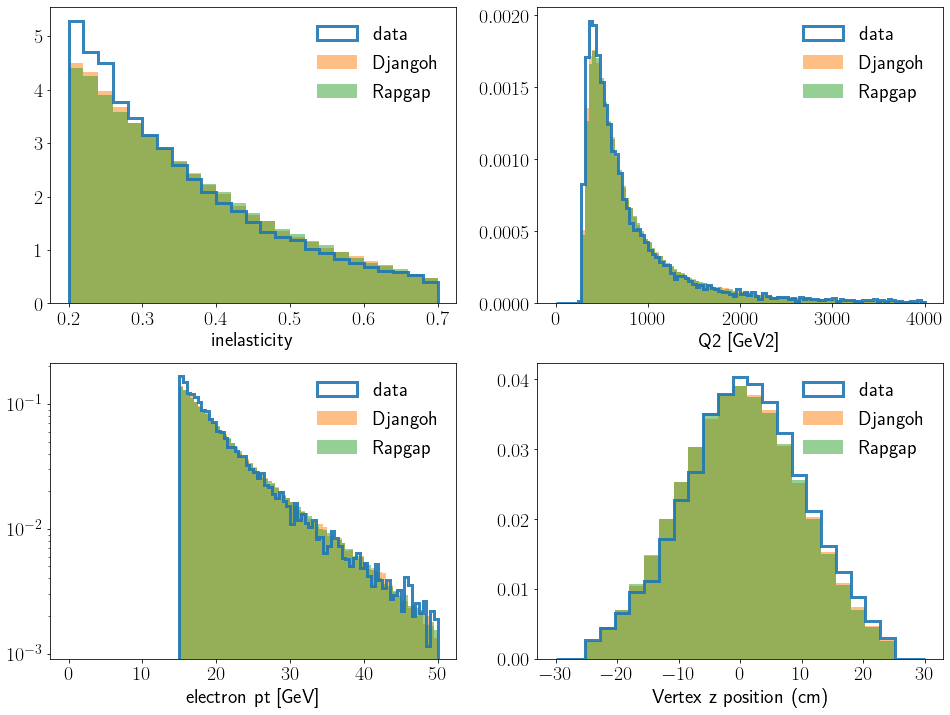

In [34]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)
plt.hist(df_jet['y'],bins=25,density=True,range=(0.2,0.7),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['y'],bins=25,density=True,range=(0.2,0.70),alpha=0.5,label=name['MC'])
plt.hist(altmc_jet['y'],bins=25,density=True,range=(0.2,0.70),alpha=0.5,label=name['alt'])

plt.ylim(bottom=0.0)

plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('inelasticity',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(222)
plt.hist(df_jet['Q2'],bins=100,density=True,range=(0,4000.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['Q2'],bins=100,density=True,range=(0,4000.0),alpha=0.5,label=name['MC'])
plt.hist(altmc_jet['Q2'],bins=100,density=True,range=(0,4000.0),alpha=0.5,label=name['alt'])
plt.xlabel('Q2 [GeV2]',fontsize=20)

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')

plt.subplot(223)
plt.hist(df_jet['e_pt'],bins=100,density=True,range=(0,50.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['e_pt'],bins=100,density=True,range=(0,50.0),alpha=0.5,label=name['MC'])
plt.hist(altmc_jet['e_pt'],bins=100,density=True,range=(0,50.0),alpha=0.5,label=name['alt'])
plt.xlabel('electron pt [GeV]',fontsize=20)

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(224)
plt.hist(df_jet['vertex_z'],bins=25,density=True,range=(-30,30),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['vertex_z'],bins=25,density=True,range=(-30,30),alpha=0.5,label=name['MC'])
plt.hist(altmc_jet['vertex_z'],bins=25,density=True,range=(-30,30),alpha=0.5,label=name['alt'])

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.xlabel('Vertex z position (cm)',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

(array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

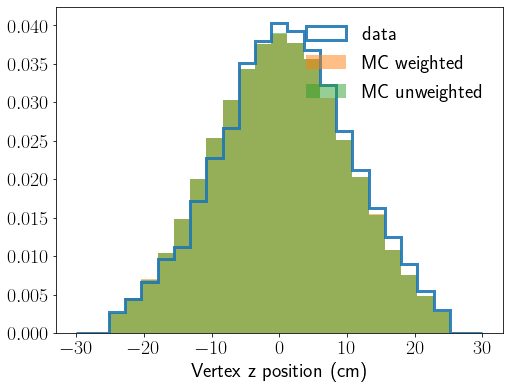

In [35]:
fig = plt.figure(figsize=(8,6))


plt.hist(df_jet['vertex_z'],bins=25,density=True,range=(-30,30),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['vertex_z'],bins=25,density=True,range=(-30,30),alpha=0.5,label='MC weighted',weights=mc_jet['WeightGen'])
plt.hist(mc_jet['vertex_z'],bins=25,density=True,range=(-30,30),alpha=0.5,label='MC unweighted')

plt.ylim(bottom=0.0)

plt.legend(loc='best',frameon=False)
plt.xlabel('Vertex z position (cm)',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

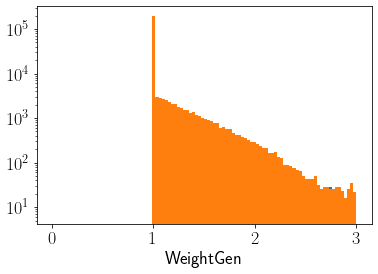

1.0634909


In [37]:
#plt.hist(mc_jet['Weight'],bins=100,range=(0,3))
plt.hist(mc_jet['WeightGen'],bins=100,range=(0,3))
plt.hist(altmc_jet['WeightGen'],bins=100,range=(0,3))
plt.xlabel('WeightGen')
plt.yscale('log')
plt.show()
print (mc_jet['WeightGen'].mean())

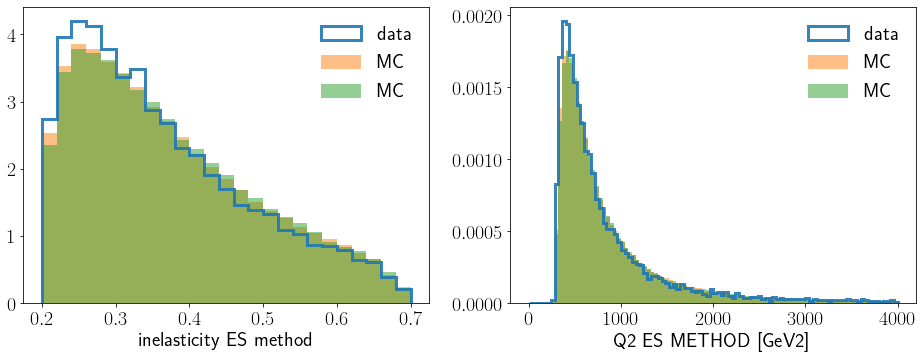

In [38]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)
plt.hist(df_jet['y_e'],bins=25,density=True,range=(0.2,0.7),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['y_e'],bins=25,density=True,range=(0.2,0.7),alpha=0.5,label='MC')
plt.hist(altmc_jet['y_e'],bins=25,density=True,range=(0.2,0.7),alpha=0.5,label='MC')

plt.ylim(bottom=0.0)

plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('inelasticity ES method',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')

plt.subplot(222)
plt.hist(df_jet['Q2_e'],bins=100,density=True,range=(0,4000.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['Q2_e'],bins=100,density=True,range=(0,4000.0),alpha=0.5,label='MC')
plt.hist(altmc_jet['Q2_e'],bins=100,density=True,range=(0,4000.0),alpha=0.5,label='MC')
plt.xlabel('Q2 ES METHOD [GeV2]',fontsize=20)

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')


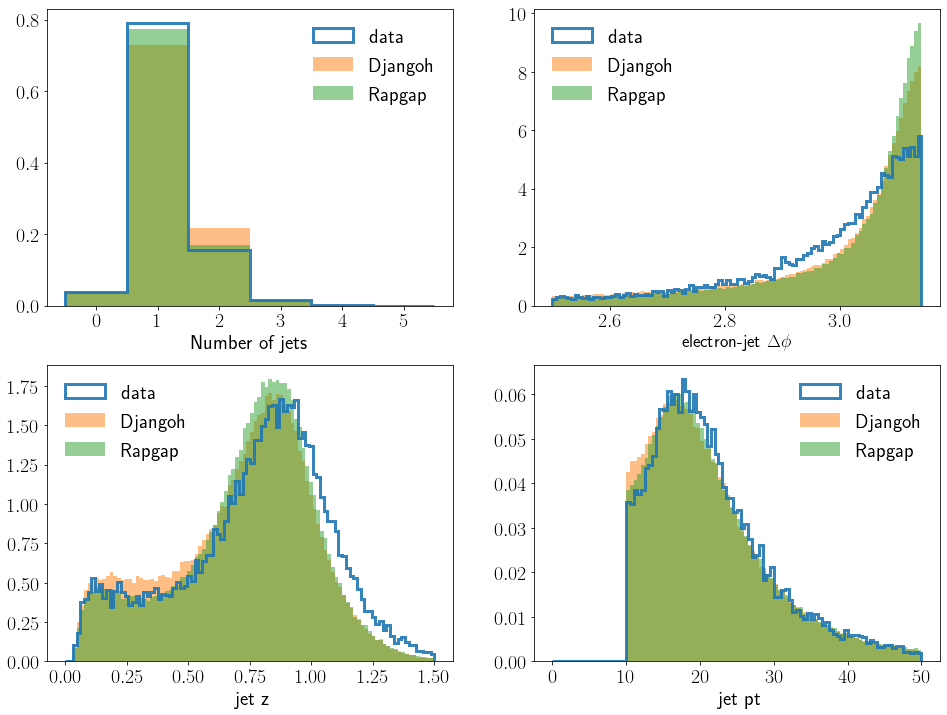

In [39]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)


plt.hist(df['njets'],bins=6,range=(-0.5,5.5), density=True,alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['njets'],bins=6,range=(-0.5,5.5),density=True,alpha=0.5,label=name['MC'])
plt.hist(altmc['njets'],bins=6,range=(-0.5,5.5),density=True,alpha=0.5,label=name['alt'])

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('Number of jets',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.subplot(222)
plt.hist(df_jet['jet_dphi'],bins=100,density=True,range=(2.5,np.pi),alpha=0.9,label='data',histtype='step',linewidth=3)
#plt.hist(dfraw_jet['jet_dphi'],bins=100,normed=True,range=(2.5,np.pi),alpha=0.9,label='data raw',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_dphi'],bins=100,density=True,range=(2.5,np.pi),alpha=0.5,label=name['MC'])
plt.hist(altmc_jet['jet_dphi'],bins=100,density=True,range=(2.5,np.pi),alpha=0.5,label=name['alt'])
plt.xlabel('electron-jet $\Delta\phi$ ')
#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')

plt.subplot(223)
plt.hist(df_jet['jet_z'],bins=100,density=True,range=(0,1.5),alpha=0.9,label='data',histtype='step',linewidth=3)
#plt.hist(dfraw_jet['jet_z'],bins=100,normed=True,range=(0,1.5),alpha=0.9,label='data raw',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_z'],bins=100,density=True,range=(0,1.5),alpha=0.5,label=name['MC'])
plt.hist(altmc_jet['jet_z'],bins=100,density=True,range=(0,1.5),alpha=0.5,label=name['alt'])
plt.xlabel('jet z ', fontsize=20)

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.subplot(224)
plt.hist(df_jet['jet_pt'],bins=100,density=True,range=(0,50.0),alpha=0.9,label='data',histtype='step',linewidth=3)
#plt.hist(dfraw_jet['jet_pt'],bins=100,normed=True,range=(0,50.0),alpha=0.9,label='data raw',histtype='step',linewidth=3)

plt.hist(mc_jet['jet_pt'],bins=100,density=True,range=(0,50.0),alpha=0.5,label=name['MC'])
plt.hist(altmc_jet['jet_pt'],bins=100,density=True,range=(0,50.0),alpha=0.5,label=name['alt'])
plt.xlabel('jet pt ', fontsize=20)

#plt.ylim(bottom=0.0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
#plt.yscale('log')
plt.legend(prop={'size': 20}, frameon=False, loc='best')


plt.savefig('H1_jet_variables.png', bbox_inches='tight')
plt.savefig('H1_jet_variables.pdf', bbox_inches='tight')


## Data vs two MCs

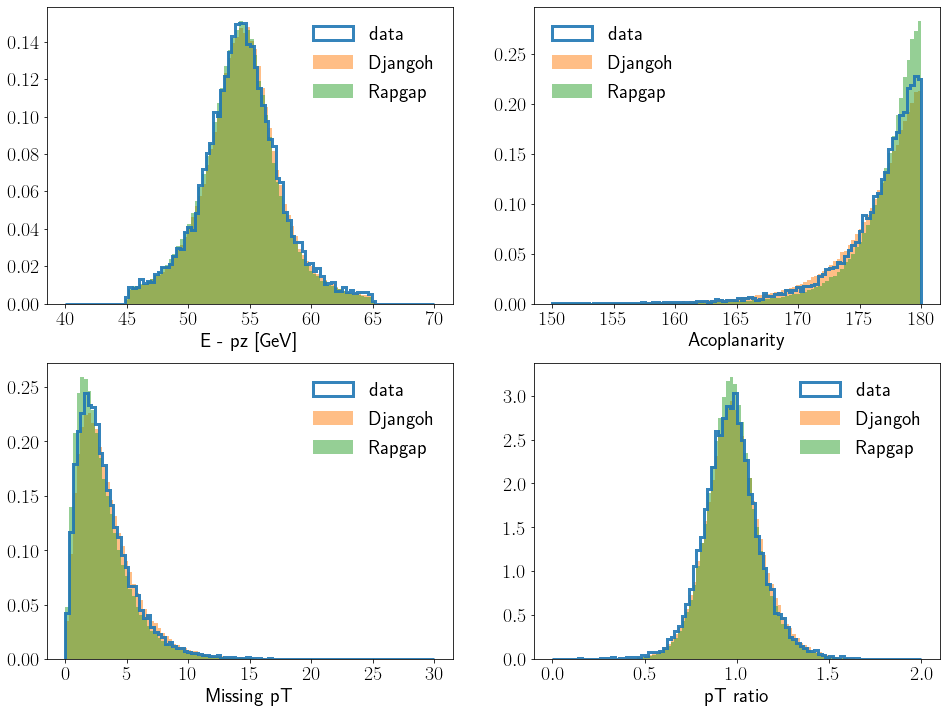

In [40]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)
plt.hist(df['Empz'],bins=100,density=True,range=(40,70.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['Empz'],bins=100,density=True,range=(40,70.0),alpha=0.5,label=name['MC'])
plt.hist(altmc['Empz'],bins=100,density=True,range=(40.0,70.0),alpha=0.5,label=name['alt'])

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('E - pz [GeV]',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(222)
plt.hist(df['acoplanarity'],bins=100,density=True,range=(150,180.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['acoplanarity'],bins=100,density=True,range=(150,180.0),alpha=0.5,label=name['MC'],weights=mc['WeightGen'])
plt.hist(altmc['acoplanarity'],bins=100,density=True,range=(150,180.0),alpha=0.5,label=name['alt'],weights=altmc['WeightGen'])

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('Acoplanarity',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.subplot(223)
plt.hist(df['ptmiss'],bins=100,density=True,range=(0.0,30.0),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['ptmiss'],bins=100,density=True,range=(0.0,30.0),alpha=0.5,label=name['MC'])
plt.hist(altmc['ptmiss'],bins=100,density=True,range=(0.0,30.0),alpha=0.5,label=name['alt'])

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('Missing pT',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(224)
plt.hist(df['ptratio'],bins=100,density=True,range=(0.0,2.0),alpha=0.9,label='data',histtype='step',linewidth=3)
#plt.hist(dfraw['ptratio'],bins=100,normed=True,range=(0.0,2.0),alpha=0.9,label='data raw',histtype='step',linewidth=3)
plt.hist(mc['ptratio'],bins=100,density=True,range=(0.0,2.0),alpha=0.5,label=name['MC'])
plt.hist(altmc['ptratio'],bins=100,density=True,range=(0.0,2.0),alpha=0.5,label=name['alt'])

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('pT ratio',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.savefig('H1_eventvariables.png', bbox_inches='tight')
plt.savefig('H1_eventvariables.pdf', bbox_inches='tight')

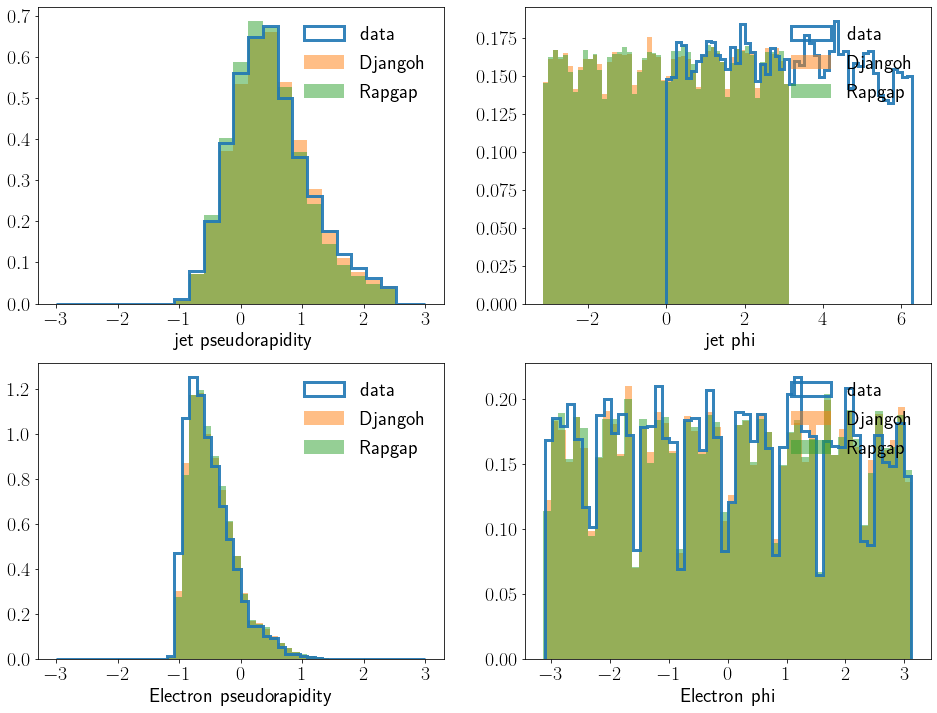

In [41]:
fig = plt.figure(figsize=(16,12))

plt.subplot(221)

plt.hist(df_jet['jet_eta'],bins=25,density=True,range=(-3.0,3.0),alpha=0.9,label='data',histtype='step',linewidth=3)
#plt.hist(dfraw_jet['jet_eta'],bins=25,normed=True,range=(-3.0,3.0),alpha=0.9,label='data raw',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_eta'],bins=25,density=True,range=(-3.0,3.0),alpha=0.5,label=name['MC'])
plt.hist(altmc_jet['jet_eta'],bins=25,density=True,range=(-3.0,3.0),alpha=0.5,label=name['alt'])

plt.ylim(bottom=0.0)

plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('jet pseudorapidity',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')




plt.subplot(224)
plt.hist(df['e_phi'],bins=50,density=True,alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['e_phi'],bins=50,density=True,alpha=0.5,label=name['MC'])
plt.hist(altmc['e_phi'],bins=50,density=True,alpha=0.5,label=name['alt'])

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('Electron phi',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(223)
plt.hist(df['e_eta'],bins=50,range=(-3.0,3.0),density=True,alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc['e_eta'],bins=50,range=(-3.0,3.0),density=True,alpha=0.5,label=name['MC'])
plt.hist(altmc['e_eta'],bins=50,range=(-3.0,3.0),density=True,alpha=0.5,label=name['alt'])

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('Electron pseudorapidity',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)


plt.subplot(222)
plt.hist(df_jet['jet_phi'],bins=50,density=True,alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(mc_jet['jet_phi'],bins=50,density=True,alpha=0.5,label=name['MC'])
plt.hist(altmc_jet['jet_phi'],bins=50,density=True,alpha=0.5,label=name['alt'])

plt.ylim(bottom=0.0)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.xlabel('jet phi',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.savefig('H1_electronjet_angularvariables.png', bbox_inches='tight')
plt.savefig('H1_electronjet_angularvariables.pdf', bbox_inches='tight')


## Azimuthal separation between lepton and jet. Normalize the distribution by the number of electrons, i.e. by the inclusive DIS cross section

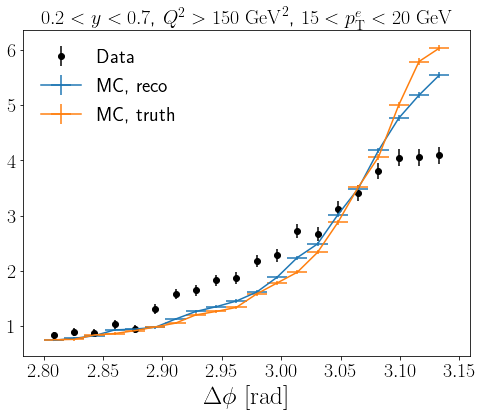

In [48]:
rc('text', usetex=True)
fig = plt.figure(figsize=(8,6))
cut = 'e_pt > %2.2f and e_pt<%2.2f'%(15,20)

df_cut = df_jet.query(cut)


#printSummary(df_cut)

mindphi = 2.8
nbins = 20#40

##Plot data
Nelectrons = df.query(cut).shape[0]
#print Nelectrons
y, x  = np.histogram(df_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y) 
y = y/width
erry = erry/width
y = np.true_divide(y, Nelectrons)
erry = np.true_divide(erry,Nelectrons)

plt.errorbar(x,y ,yerr=erry,  fmt='o',ls='none',color='black',label='Data')




    
#Plot MC at the reconstructed level
mc_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
Nelectrons = mc.query(cut).shape[0]
#print Nelectrons
#printSummary(df_cut)
y, x  = np.histogram(mc_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)
y = y/width
erry = erry/width
y = np.true_divide(y, Nelectrons)
erry = np.true_divide(erry,Nelectrons)
plt.errorbar(x,y ,xerr=width/2.0,yerr=erry,  fmt='-',label='MC, reco')

#Plot MC at the generated level

mc_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(15,20))
Nelectrons = mc.query(cut).shape[0]
#print Nelectrons
#printSummary(df_cut)
y, x  = np.histogram(mc_cut['genjet_dphi'],bins=nbins,range=(mindphi,np.pi))
width = (x[1:]-x[:-1])
x = (x[1:]+x[:-1])/2.0
erry = np.sqrt(y)
y = y/width
erry = erry/width
y = np.true_divide(y, Nelectrons)
erry = np.true_divide(erry,Nelectrons)
plt.errorbar(x,y ,xerr=width/2.0, yerr=erry,  fmt='-',label='MC, truth')



plt.xlabel(r'$\Delta\phi$ $\mathrm{[rad]}$', fontsize=25)
#plt.ylabel(r'$1/\sigma_{DIS} d\sigma/d\Delta\phi}$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)


#plt.text(6,0.14, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(15,20) + '$\ \mathrm{ GeV}$ \n $0.2<y<0.7$ \n' +
 #                   r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=21)


#plt.text(6,0.12, r'\langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%( df_cut['Q2'].mean()),fontsize=21)

#plt.text(6, 0.19, 'H1 INTERNAL', fontsize=28)

plt.title('$0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$, $15<p_{\mathrm{T}}^{e}<20$ $\mathrm{GeV}$',fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('H1_deltaphi.png', bbox_inches='tight')
plt.savefig('H1_deltaphi.pdf', bbox_inches='tight')
#plt.yscale('log')
plt.savefig('H1_deltaphi_log.png', bbox_inches='tight')
plt.savefig('H1_deltaphi_log.pdf', bbox_inches='tight')

## Azimuthal separation between lepton and jet for various electron pT ranges/'

###########
###########
###########


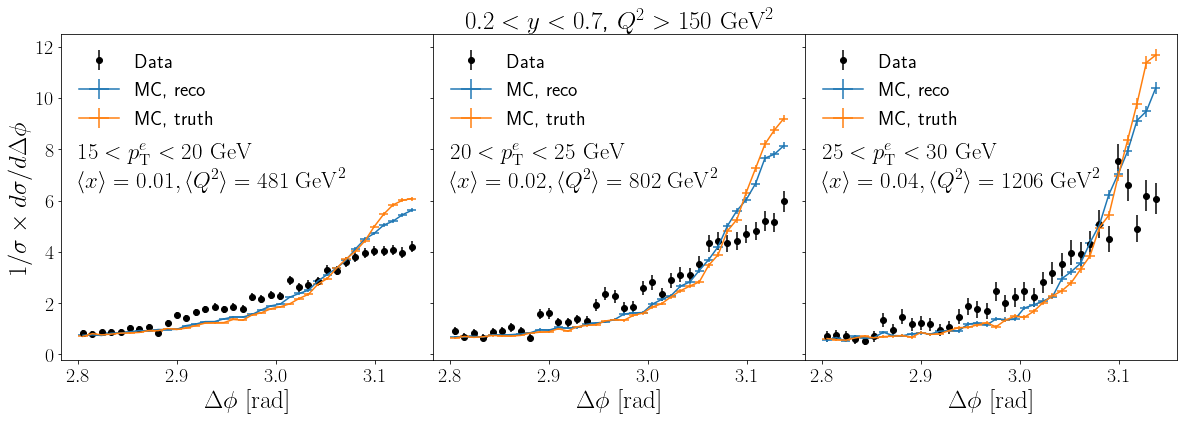

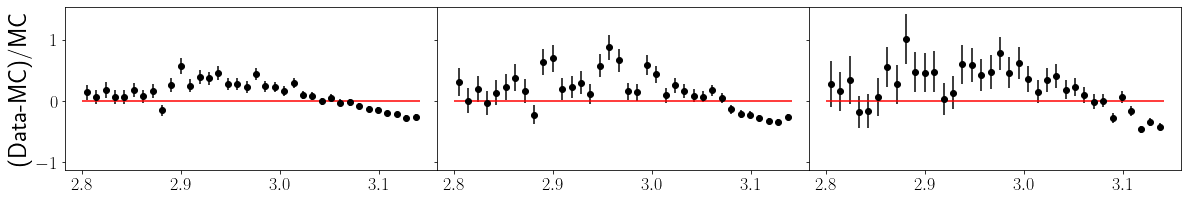

In [52]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})
fig2, axs2 = plt.subplots(1, 3,sharey=True, figsize=(20,3), gridspec_kw={'wspace':0, 'hspace':0})

#fig.add_axes((0.1,0.3,0.88,0.6))

nbins = 36#36
minimo = 2.8
for counter,edges in enumerate([(15,20), (20,25),(25,30)]):
    cut = 'e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1])
    df_cut = df_jet.query(cut)
    #printSummary(df_cut)
    print ('###########')
    
    ##Plot data
    Nelectrons = df.query(cut).shape[0]
    y, x  = np.histogram(df_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)   
    y = y/width
    erry = erry/width
    y = np.true_divide(y, Nelectrons)
    erry = np.true_divide(erry,Nelectrons)
    
    
    axs[counter].errorbar(x,y ,yerr=erry,  fmt='o',ls='none',color='black',label='Data')
    
    
    #plot mc
    #Plot MC at the reconstructed level
    mc_cut = mc_jet.query(cut)
    Nelectrons = mc.query(cut).shape[0]
    #printSummary(df_cut)
    mcy, x  = np.histogram(mc_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    errmcy = np.sqrt(mcy)
    mcy = mcy/width
    errmcy = errmcy/width
    mcy = np.true_divide(mcy, Nelectrons)
    errmcy = np.true_divide(errmcy,Nelectrons)
    axs[counter].errorbar(x,mcy ,xerr=width/2.0,yerr=errmcy,  fmt='-',label='MC, reco')
    ratio = np.divide(y-mcy, mcy,  out=np.zeros_like(mcy), where=mcy!=0)
    error_ratio = np.divide(erry, mcy,  out=np.zeros_like(mcy), where=mcy!=0)
    
    axs2[counter].errorbar(x,ratio,yerr=error_ratio,color='black',ls='none',fmt='o')
    axs2[counter].hlines(0.0, minimo, np.pi,color='red')
    axs2[0].yaxis.set_label_text('(Data-MC)/MC ', fontsize=25)
    axs2[counter].yaxis.set_data_interval(-1.0,1.0)

    
    #Plot MC at the generated level
    mc_cut = mc_jet.query(cut)
    Nelectrons = mc.query(cut).shape[0]
    #printSummary(df_cut)
    y, x  = np.histogram(mc_cut['genjet_dphi'],bins=nbins,range=(mindphi,np.pi))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    y = y/width
    erry = erry/width
    y = np.true_divide(y, Nelectrons)
    erry = np.true_divide(erry,Nelectrons)
    axs[counter].errorbar(x,y ,xerr=width/2.0, yerr=erry,  fmt='-',label='MC, truth')

    

    
    axs[counter].xaxis.set_label_text(r'$\Delta\phi$ $\mathrm{[rad]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')
    
    axs[counter].text(minimo,6.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=23)

#axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  
axs[1].set_title(r' $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_LeptonJetAzimuthal.png', bbox_inches='tight')
plt.savefig('H1_LeptonJetAzimuthal.pdf', bbox_inches='tight')

#np.divide(self.data- fitTotal , totalerror,  out=np.zeros_like(totalerror), where=totalerror!=0)

## dphi for WTA and Echeme (reco level)

###########
###########
###########
###########
###########
###########


Text(0.5, 1.0, ' $0.2<y<0.7$, $Q^{2}>150$ $\\mathrm{GeV}^{2}$')

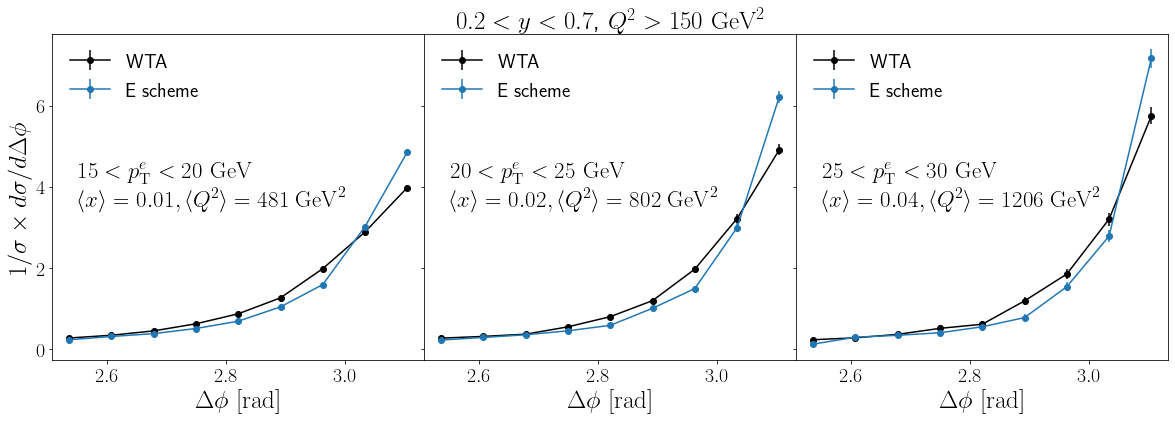

In [67]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})

#fig.add_axes((0.1,0.3,0.88,0.6))

nbins = 9#36
mindphi = 2.5
for counter,edges in enumerate([(15,20), (20,25),(25,30)]):
    cut = 'e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1])
    df_cut = df_jet.query(cut)
    #printSummary(df_cut)
    print ('###########')
    
    ##Plot data
    Nelectrons = df.query(cut).shape[0]
    y, x  = np.histogram(df_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)   
    y = y/width
    erry = erry/width
    y = np.true_divide(y, Nelectrons)
    erry = np.true_divide(erry,Nelectrons)
    
    
    axs[counter].errorbar(x,y ,yerr=erry,  fmt='o-',color='black',label='WTA')
    
    ##alternative
    dfraw_cut = dfraw_jet.query(cut)
    #printSummary(df_cut)
    print ('###########')
    
    ##Plot data
    Nelectrons = dfraw.query(cut).shape[0]
    y, x  = np.histogram(dfraw_cut['jet_dphi'],bins=nbins,range=(mindphi,np.pi))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)   
    y = y/width
    erry = erry/width
    y = np.true_divide(y, Nelectrons)
    erry = np.true_divide(erry,Nelectrons)
    
    
    axs[counter].errorbar(x,y ,yerr=erry,  fmt='o-',label='E scheme')
    
    axs[counter].xaxis.set_label_text(r'$\Delta\phi$ $\mathrm{[rad]}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')
    
    axs[counter].text(mindphi+0.05,3.5, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=23)

#axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  
axs[1].set_title(r' $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

## qT/jetpT

In [ ]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})
fig2, axs2 = plt.subplots(1, 3,sharey=True, figsize=(20,3), gridspec_kw={'wspace':0, 'hspace':0})

#fig.add_axes((0.1,0.3,0.88,0.6))

nbins = 36#36
minimo = 2.8
for counter,edges in enumerate([(15,20), (20,25),(25,30)]):
    cut = 'e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1])
    df_cut = df_jet.query(cut)
    #printSummary(df_cut)
    print '###########'
    
    ##Plot data
    Nelectrons = df.query(cut).shape[0]
    y, x  = np.histogram(df_cut['jet_qtnormjetpt'],bins=nbins,range=(0.0,1.0))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)   
    y = y/width
    erry = erry/width
    y = np.true_divide(y, Nelectrons)
    erry = np.true_divide(erry,Nelectrons)
    
    
    axs[counter].errorbar(x,y ,yerr=erry,  fmt='o',ls='none',color='black',label='Data')
    
    
    #plot mc
    #Plot MC at the reconstructed level
    mc_cut = mc_jet.query(cut)
    Nelectrons = mc.query(cut).shape[0]
    print Nelectrons
    #printSummary(df_cut)
    mcy, x  = np.histogram(mc_cut['jet_qtnormjetpt'],bins=nbins,range=(0.0,1.0))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    errmcy = np.sqrt(mcy)
    mcy = mcy/width
    errmcy = errmcy/width
    mcy = np.true_divide(mcy, Nelectrons)
    errmcy = np.true_divide(errmcy,Nelectrons)
    axs[counter].errorbar(x,mcy ,xerr=width/2.0,yerr=errmcy,  fmt='-',label='MC, reco')


    print 'y'
    print y 
    print 'mcy'
    print mcy
    ratio = np.divide(y-mcy, mcy,  out=np.zeros_like(mcy), where=mcy!=0)
    error_ratio = np.divide(erry, mcy,  out=np.zeros_like(mcy), where=mcy!=0)
    print ratio
    
    axs2[counter].errorbar(x,ratio,yerr=error_ratio,color='black',ls='none',fmt='o')
    axs2[counter].hlines(0.0, 0.0, 1.0,color='red')
    axs2[0].yaxis.set_label_text('(Data-MC)/MC ', fontsize=25)
    axs2[counter].yaxis.set_data_interval(-1.0,1.0)

    
    #Plot MC at the generated level
    mc_cut = mc_jet.query(cut)
    Nelectrons = mc.query(cut).shape[0]
    #print Nelectrons
    #printSummary(df_cut)
    y, x  = np.histogram(mc_cut['genjet_qtnormjetpt'],bins=nbins,range=(0.0,1.0))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    y = y/width
    erry = erry/width
    y = np.true_divide(y, Nelectrons)
    erry = np.true_divide(erry,Nelectrons)
    axs[counter].errorbar(x,y ,xerr=width/2.0, yerr=erry,  fmt='-',label='MC, truth')

    

    
    axs[counter].xaxis.set_label_text(r'$q_{T}/p_{T}^{jet}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d q_{T}/p_{T}^{jet}$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')
    
    axs[counter].text(0.2,2.9, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=23)

axs[1].set_title(r' $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_LeptonJetqt.png', bbox_inches='tight')
plt.savefig('H1_LeptonJetqt.pdf', bbox_inches='tight')

#np.divide(self.data- fitTotal , totalerror,  out=np.zeros_like(totalerror), where=totalerror!=0)

## qT

In [ ]:

from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})
fig2, axs2 = plt.subplots(1, 3,sharey=True, figsize=(20,3), gridspec_kw={'wspace':0, 'hspace':0})

#fig.add_axes((0.1,0.3,0.88,0.6))

nbins = 36#36
minimo = 2.8
for counter,edges in enumerate([(15,20), (20,25),(25,30)]):
    cut = 'e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1])
    df_cut = df_jet.query(cut)
    #printSummary(df_cut)
    print '###########'
    
    ##Plot data
    Nelectrons = df.query(cut).shape[0]
    y, x  = np.histogram(df_cut['jet_qt'],bins=nbins,range=(0.0,10.0))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)   
    y = y/width
    erry = erry/width
    y = np.true_divide(y, Nelectrons)
    erry = np.true_divide(erry,Nelectrons)
    
    
    axs[counter].errorbar(x,y ,yerr=erry,  fmt='o',ls='none',color='black',label='Data')
    
    
    #plot mc
    #Plot MC at the reconstructed level
    mc_cut = mc_jet.query(cut)
    Nelectrons = mc.query(cut).shape[0]
    print Nelectrons
    #printSummary(df_cut)
    mcy, x  = np.histogram(mc_cut['jet_qt'],bins=nbins,range=(0.0,10.0))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    errmcy = np.sqrt(mcy)
    mcy = mcy/width
    errmcy = errmcy/width
    mcy = np.true_divide(mcy, Nelectrons)
    errmcy = np.true_divide(errmcy,Nelectrons)
    axs[counter].errorbar(x,mcy ,xerr=width/2.0,yerr=errmcy,  fmt='-',label='MC, reco')


    print 'y'
    print y 
    print 'mcy'
    print mcy
    ratio = np.divide(y-mcy, mcy,  out=np.zeros_like(mcy), where=mcy!=0)
    error_ratio = np.divide(erry, mcy,  out=np.zeros_like(mcy), where=mcy!=0)
    print ratio
    
    axs2[counter].errorbar(x,ratio,yerr=error_ratio,color='black',ls='none',fmt='o')
    axs2[counter].hlines(0.0, 0.0, 10.0,color='red')
    axs2[0].yaxis.set_label_text('(Data-MC)/MC ', fontsize=25)
    axs2[counter].yaxis.set_data_interval(-1.0,1.0)

    
    #Plot MC at the generated level
    mc_cut = mc_jet.query(cut)
    Nelectrons = mc.query(cut).shape[0]
    #print Nelectrons
    #printSummary(df_cut)
    y, x  = np.histogram(mc_cut['genjet_qt'],bins=nbins,range=(0.0,10.0))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    y = y/width
    erry = erry/width
    y = np.true_divide(y, Nelectrons)
    erry = np.true_divide(erry,Nelectrons)
    axs[counter].errorbar(x,y ,xerr=width/2.0, yerr=erry,  fmt='-',label='MC, truth')

    

    
    axs[counter].xaxis.set_label_text(r'$q_{T}}$', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d q_{T}$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='upper left')
    
    axs[counter].text(5,0.2, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f GeV$'%(edges[0],edges[1]) , fontsize=23)#+ '$\ \mathrm{ GeV}$ \n' +
                      #r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=23)

axs[1].set_title(r' $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_LeptonJetqt.png', bbox_inches='tight')
plt.savefig('H1_LeptonJetqt.pdf', bbox_inches='tight')

## qT distribution


In [ ]:


from matplotlib import rc
rc('text', usetex=True)


fig, axs = plt.subplots(1, 3,sharey=True, figsize=(20,6), gridspec_kw={'wspace':0, 'hspace':0})

maxrange = 1.0
nbins = 15
for counter,edges in enumerate([(15,20), (20,30),(30,50)]):

    df_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    #printSummary(df_cut)
    print '###########'
    
    y, x  = np.histogram(df_cut['jet_qtnormept'],bins=nbins,range=(0,maxrange))
    width = (x[1:]-x[:-1])
    x = (x[1:]+x[:-1])/2.0
    erry = np.sqrt(y)
    integral = np.sum(y)
    print 1.0*integral 
    y = y/width
    erry = erry/width
    y = np.true_divide(y,integral)
    erry= np.true_divide(erry,integral)

    axs[counter].errorbar(x,y ,yerr=erry, xerr=width/2.0, fmt='o',ls='none',color='black',label='Data')
    
    df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(edges[0],edges[1]))
    axs[counter].hist(df_cut['jet_qtnormept'],bins=nbins,range=(0,maxrange),normed=True,alpha=0.9, label='MC, reco',histtype='step',lw=3)
    printSummary(df_cut)
    

    
    
    ##plotting labels 
    axs[counter].xaxis.set_label_text(r'$q_{\mathrm{T}}/ p_{\mathrm{T}}^{\mathrm{e}}$ ', fontsize=25)
    axs[0].yaxis.set_label_text(r'$1/\sigma \times d\sigma/d\Delta\phi$ ', fontsize=25)
    axs[counter].tick_params('both',labelsize=20)
    plt.yticks(fontsize=20)
    #axs[counter].text(0.1,6, , fontsize=20)
    #axs[counter].text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
    #plt.legend(prop={'size': 20}, frameon=False, loc='best')
    axs[counter].legend(prop={'size': 20}, frameon=False, loc='best')

    #axs[counter].text(4.5,0.17, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(edges[0],edges[1]) + '$\ \mathrm{ GeV}$ \n' +
     #                 r'$\langle x \rangle = %2.2f'%(df_cut['x'].mean()), fontsize=23)

axs[1].set_title(r'$\mathrm{H1}$ $\mathrm{Internal}$, $0.2<y<0.7$, $Q^{2}>150$ $\mathrm{GeV}^{2}$',fontsize=25)  

plt.savefig('H1_Leptonqtnormed_ept.png', bbox_inches='tight')
plt.savefig('H1_Leptonqtnormed_ept.pdf', bbox_inches='tight')

In [ ]:
df_cut = df_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,2.5),alpha=0.7, normed=True)

df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)

df_cut = mc_jet.query('e_pt>15 and e_pt<20 and jet_dphi>3.0')
plt.hist(df_cut['jet_qtnormept'],bins=20,range = (0,1.2),alpha=0.7, normed=True)
plt.yscale('log')

## Polarization stuff

In [ ]:
plt.hist(df['polarization'],range=(-100,100),bins=100)
plt.xlabel('polarization')
plt.show()

In [ ]:
plt.hist(df_jet.query('polarization>20')['jet_phi'],bins=10,normed=True,range=(-np.pi,np.pi),alpha=0.9,label='data',histtype='step',linewidth=3)
plt.hist(df_jet.query('polarization<-20')['jet_phi'],bins=10,normed=True,range=(-np.pi,np.pi),alpha=0.9,label='data',histtype='step',linewidth=3)
